# **(1) Data Preparation**

## 1. Mengatasi Missing Values (data yang hilang atau kosong)

**Import Library**

In [ ]:
# Library yang dipakai
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Supaya visualisasi tampil langsung di dalam notebook
%matplotlib inline

**Penjelasan Kode :**

Kode ini mengimpor berbagai library yang diperlukan untuk manipulasi data, visualisasi, dan pengolahan model.

`pandas` dan `numpy` digunakan untuk manipulasi data.

`seaborn` dan `matplotlib.pyplot` digunakan untuk visualisasi.

`SMOTE` dari `imblearn` digunakan untuk menangani data yang tidak seimbang (biasanya digunakan saat melakukan oversampling).

`pickle` digunakan untuk menyimpan model yang telah dilatih, agar bisa digunakan kembali di masa depan.

`warnings` digunakan untuk menonaktifkan peringatan yang terkait dengan perubahan mendatang (misalnya `FutureWarning`).

`%matplotlib inline` memastikan bahwa grafik yang dibuat dengan `matplotlib` tampil langsung di dalam notebook.

**Insight:**

Mengimpor library yang tepat adalah langkah awal yang penting. Library ini sangat mendukung dalam analisis data dan visualisasi, serta memberi fleksibilitas dalam menangani model.

**Membaca Dataset dan Merapikan Data**

In [ ]:
# Membaca dataset
df = pd.read_csv("/content/Convert CO2 Emissions into Biogas as Renewable Energy.csv")

# Merapihkan dataset dengan pivot table
pivot_df = df.pivot_table(
    index=['Reference area', 'TIME_PERIOD'],  # Menetapkan Reference area dan TIME_PERIOD sebagai index
    columns=['Measure', 'Unit of measure'],  # Menggunakan Measure dan Unit of Measure sebagai kolom
    values='OBS_VALUE',  # Mengambil OBS_VALUE sebagai nilai
    aggfunc='first'  # Menggunakan fungsi 'first' agar tidak ada data yang dihapus
)

# Menghilangkan copywarning
pd.options.mode.chained_assignment = None


# Lihat dataset
pivot_df

Measure                                  Population density  \
Unit of measure            Inhabitants per square kilometre   
Reference area TIME_PERIOD                                    
Indonesia      1990                                   96.03   
               1991                                   97.74   
               1992                                   99.45   
               1993                                  101.16   
               1994                                  102.88   
               1995                                  104.60   
               1996                                  106.34   
               1997                                  108.08   
               1998                                  109.80   
               1999                                  111.47   
               2000                                  113.08   
               2001                                  114.66   
               2002                                  116.22   
               2003                                  117.77   
               2004                                  119.28   
               2005                                  120.82   
               2006                                  122.43   
               2007                                  124.06   
               2008                                  125.68   
               2009                                  127.28   
               2010                                  128.89   
               2011                                  130.55   
               2012                                  132.24   
               2013                                  133.89   
               2014                                  135.47   
               2015                                  137.00   
               2016                                  138.48   
               2017                                  139.90   
               2018                                  141.27   
               2019                                  142.60   
               2020                                  143.81   
               2021                                  144.83   
               2022                                  145.91   
               2023                                  147.15   

Measure                    Production-based CO2 intensity, energy-related CO2 per capita  \
Unit of measure                                      Tonnes of CO2-equivalent per person   
Reference area TIME_PERIOD                                                                 
Indonesia      1990                                                       NaN              
               1991                                                       NaN              
               1992                                                       NaN              
               1993                                                       NaN              
               1994                                                       NaN              
               1995                                                      1.02              
               1996                                                      1.05              
               1997                                                      1.15              
               1998                                                      1.16              
               1999                                                      1.23              
               2000                                                      1.21              
               2001                                                      1.28              
               2002                                                      1.29              
               2003                                                      1.40              
               2004                                                      1.41              
            

**Penjelasan Kode :**

Membaca Dataset, Kode dimulai dengan membaca file CSV berjudul `"Convert CO2 Emissions into Biogas as Renewable Energy.csv"` menggunakan fungsi `pd.read_csv`. Data ini disimpan dalam DataFrame bernama `df`, yang berisi data emisi CO₂ dan beberapa indikator lainnya terkait energi dan ekonomi.

Merapihkan Dataset dengan Pivot Table, Setelah membaca data, kode ini membuat pivot table dari df dan menyimpannya dalam `pivot_df.`

Pada pivot table ini:

`index=['Reference area', 'TIME_PERIOD']`, Kolom Reference area (area referensi seperti negara) dan TIME_PERIOD (tahun) digunakan sebagai indeks, mengatur data berdasarkan wilayah dan waktu.

`columns=['Measure', 'Unit of measure']`, Kolom Measure (ukuran yang diamati) dan Unit of measure (satuan pengukuran) digunakan sebagai kolom di pivot table. Ini membantu mengelompokkan data berdasarkan measure tertentu.

`values='OBS_VALUE'`, Nilai yang diambil berasal dari kolom `OBS_VALUE`, yang mewakili nilai numerik dari setiap observasi.

`aggfunc='first'`, Untuk menangani data yang berpotensi duplikat dalam indeks dan kolom yang sama, fungsi agregasi `'first'` digunakan. Ini memastikan bahwa hanya nilai pertama yang diambil tanpa menghapus data lain.

Menghilangkan Peringatan CopyWarning, Baris `pd.options.mode.chained_assignment = None` digunakan untuk menonaktifkan peringatan SettingWithCopyWarning. Ini penting untuk memastikan bahwa ketika ada operasi pada salinan DataFrame, tidak ada peringatan yang muncul, dan kode tetap berjalan lancar.

Menampilkan Pivot Table, Akhirnya, `pivot_df` menampilkan data yang telah diproses menjadi pivot table. Pivot table ini memiliki struktur yang lebih terorganisir, memudahkan dalam analisis dan pemahaman data.

**Insight :**

Output dari kode menunjukkan data CO₂ Emissions dari berbagai tahun di Indonesia, dengan variable seperti Population Density, Production-based CO₂ Intensity, Real GDP per Capita, Renewable Energy Supply, dan Total Energy Supply. Tabel ini mempermudah analisis tren perubahan data per tahun dan memungkinkan perbandingan antar indikator.

**Melihat jumlah data**

In [ ]:
pivot_df.shape

(34, 5)

**Penjelasan Kode :**

`shape` digunakan untuk melihat dimensi DataFrame, yaitu jumlah baris dan kolom dalam dataset.

**Insight :**

Data memiliki total 34 baris dan 5 kolom. Ini berarti ada 34 data pengamatan yang akan digunakan dalam analisis.

**Informasi Dataset**

In [ ]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 34 entries, ('Indonesia', 1990) to ('Indonesia', 2023)
Data columns (total 5 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   (Population density, Inhabitants per square kilometre)                                                34 non-null     float64
 1   (Production-based CO2 intensity, energy-related CO2 per capita, Tonnes of CO2-equivalent per person)  27 non-null     float64
 2   (Real GDP per capita, US dollars per person, PPP converted)                                           34 non-null     float64
 3   (Renewable energy supply, Tonnes of oil equivalent)                                                   33 non-null     float64
 4   (Total energy supply, Tonnes of oil equivalent)                         

**Penjelasan Kode :**

`info()` memberikan informasi tentang dataset, termasuk tipe data dan jumlah nilai non-null di setiap kolom.

**Insight :**

Menampilkan struktur data pivot_df dengan indeks ganda (tahun dan negara) serta lima kolom bertipe float64. Kolom 'Production-based CO2 intensity' memiliki 27 nilai yang tercatat (non-null) dari total 34 data, yang mengindikasikan adanya data yang hilang. Kolom 'Renewable energy supply' dan 'Total energy supply' juga memiliki masing-masing 33 data yang tercatat dari total 34

**Jumlah Data yang Digunakan**

In [ ]:
print('Jumlah data yang digunakan :', str(len(pivot_df)))

Jumlah data yang digunakan : 34


**Penjelasan Kode :**

`len(pivot_df)` digunakan untuk menghitung jumlah baris dalam dataset, menunjukkan banyaknya data yang akan digunakan dalam analisis.

**Insight :**

Jumlah data yang digunakan sebanyak 34 baris, sama seperti hasil pada kode .shape. Ini memastikan bahwa semua data telah dimuat dengan benar dalam DataFrame.

**Checking dan Handling Missing Value**

In [ ]:
# Membuat fungsi untuk missing data
def missing_data_info(df):
    missing_values = df.isnull().sum()
    percentage_missing = (missing_values / len(df)) * 100
    return pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing (%)': percentage_missing
    })

# Menampilkan persentase missing value tiap measure
missing_data_info(pivot_df)

,,Missing Values,Percentage Missing (%)
Measure,Unit of measure,,
Population density,Inhabitants per square kilometre,0,0.000000
"Production-based CO2 intensity, energy-related CO2 per capita",Tonnes of CO2-equivalent per person,7,20.588235
Real GDP per capita,"US dollars per person, PPP converted",0,0.000000
Renewable energy supply,Tonnes of oil equivalent,1,2.941176
Total energy supply,Tonnes of oil equivalent,1,2.941176


**Penjelasan Kode :**

Fungsi `missing_data_info()` dibuat untuk menghitung jumlah dan persentase missing values (nilai yang hilang) di setiap kolom.
Fungsi ini kemudian mengembalikan DataFrame yang berisi jumlah missing values dan persentase hilangnya untuk masing-masing kolom.

**Insight :**

Output ini menunjukkan bahwa kolom Production-based CO2 intensity memiliki 7 nilai kosong (sekitar 20.59% data kosong). Kolom Renewable energy supply dan Total energy supply memiliki masing-masing 1 nilai kosong (sekitar 2.94%). Informasi ini membantu menentukan kolom mana yang perlu ditangani untuk mengurangi missing values sebelum analisis lebih lanjut.

**Handling Missing Values pada Kolom**

In [ ]:
# Handling missing values pada kolom
try:
    # Mengisi missing values untuk kolom 'Production-based CO2 intensity, energy-related CO2 per capita'
    pivot_df['Production-based CO2 intensity, energy-related CO2 per capita'] = pivot_df['Production-based CO2 intensity, energy-related CO2 per capita'].fillna(method='ffill').fillna(method='bfill')

    # Mengisi missing values untuk kolom 'Renewable energy supply'
    pivot_df['Renewable energy supply'] = pivot_df['Renewable energy supply'].fillna(method='ffill').fillna(method='bfill')

    # Mengisi missing values untuk kolom 'Total energy supply'
    pivot_df['Total energy supply'] = pivot_df['Total energy supply'].fillna(method='ffill').fillna(method='bfill')

except KeyError:
    # Error handling jika ada kolom yang tidak ditemukan
    print("Nama kolom tidak ditemukan, cek kembali nama kolom yang ada di DataFrame.")

# Menampilkan persentase missing values setelah handling
missing_data_info(pivot_df).style.set_caption("Missing Data Info Setelah Handling").format({"Percentage Missing (%)": "{:.2f}"})

,,Missing Values,Percentage Missing (%)
Measure,Unit of measure,,
Population density,Inhabitants per square kilometre,0,0.00
"Production-based CO2 intensity, energy-related CO2 per capita",Tonnes of CO2-equivalent per person,0,0.00
Real GDP per capita,"US dollars per person, PPP converted",0,0.00
Renewable energy supply,Tonnes of oil equivalent,0,0.00
Total energy supply,Tonnes of oil equivalent,0,0.00


**Penjelasan Kode :**

Pada kode ini, missing values pada kolom-kolom tertentu diisi dengan menggunakan metode `forward fill (ffill)` dan `backward fill (bfill)`.
Proses ini dilakukan dalam `try-except block` untuk menghindari error jika ada kolom yang tidak ditemukan dalam DataFrame.
Setelah itu, persentase missing values diperbarui dan ditampilkan.

**Insight :**

Setelah mengisi missing values menggunakan metode forward fill (ffill) dan backward fill (bfill), semua nilai kosong berhasil diisi, sehingga persentase missing values menjadi 0% untuk setiap kolom. Data sekarang lebih lengkap dan siap untuk dianalisis lebih lanjut tanpa kehilangan informasi karena missing values.

**Menampilkan data setelah penanganan Missing Value**

In [ ]:
pivot_df

Measure                                  Population density  \
Unit of measure            Inhabitants per square kilometre   
Reference area TIME_PERIOD                                    
Indonesia      1990                                   96.03   
               1991                                   97.74   
               1992                                   99.45   
               1993                                  101.16   
               1994                                  102.88   
               1995                                  104.60   
               1996                                  106.34   
               1997                                  108.08   
               1998                                  109.80   
               1999                                  111.47   
               2000                                  113.08   
               2001                                  114.66   
               2002                                  116.22   
               2003                                  117.77   
               2004                                  119.28   
               2005                                  120.82   
               2006                                  122.43   
               2007                                  124.06   
               2008                                  125.68   
               2009                                  127.28   
               2010                                  128.89   
               2011                                  130.55   
               2012                                  132.24   
               2013                                  133.89   
               2014                                  135.47   
               2015                                  137.00   
               2016                                  138.48   
               2017                                  139.90   
               2018                                  141.27   
               2019                                  142.60   
               2020                                  143.81   
               2021                                  144.83   
               2022                                  145.91   
               2023                                  147.15   

Measure                    Production-based CO2 intensity, energy-related CO2 per capita  \
Unit of measure                                      Tonnes of CO2-equivalent per person   
Reference area TIME_PERIOD                                                                 
Indonesia      1990                                                      1.02              
               1991                                                      1.02              
               1992                                                      1.02              
               1993                                                      1.02              
               1994                                                      1.02              
               1995                                                      1.02              
               1996                                                      1.05              
               1997                                                      1.15              
               1998                                                      1.16              
               1999                                                      1.23              
               2000                                                      1.21              
               2001                                                      1.28              
               2002                                                      1.29              
               2003                                                      1.40              
               2004                                                      1.41              
            

## 2. Menangani data yang duplikat

In [ ]:
# Memeriksa data duplikasi
duplikat = pivot_df.duplicated().sum()
print(f"Jumlah data duplikat: {duplikat}")

# Membuat salinan dataframe sebelum duplikasi dibersihkan
pivot_df_cleaned = pivot_df.copy()

# Menghapus data yang duplikat jika ada
if duplikat > 0:
    pivot_df_cleaned = pivot_df_cleaned.drop_duplicates()
    print("Data duplikat telah dihapus.")
else:
    print("Tidak ada data duplikat yang ditemukan.")

Jumlah data duplikat: 0
Tidak ada data duplikat yang ditemukan.


**Penjelasan Kode :**

Kode di atas berfungsi untuk memeriksa jumlah data yang duplikat dalam `pivot_df` dan menghapusnya jika ditemukan. Pertama, menghitung jumlah data duplikat, lalu jika ada duplikat, data tersebut dihapus dan data yang bersih dari duplikat disimpan dalam `pivot_df_cleaned`.

**Insight :**

Hasil ini menunjukkan bahwa tidak ada data duplikat dalam pivot_df. Dengan begitu, tidak perlu melakukan penghapusan data tambahan, sehingga data tetap utuh.

# **(2) Statistics for Data Science & Exploratory Data Analysis (EDA)**

## 1. Mengelaborasi kolom/features dan Tipe Data (Nominal, Ordinal, Numerical)

In [ ]:
# Tipe data setiap kolom
print("Tipe data setiap kolom:\n", pivot_df.dtypes)

# Mengelompokkan kolom berdasarkan tipe data
nominal_cols = pivot_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = pivot_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ordinal cols
ordinal_cols = []

print(f"Nominal Columns: {nominal_cols}")
print(f"Numerical Columns: {numerical_cols}")
print(f"Ordinal Columns: {ordinal_cols}")

Tipe data setiap kolom:
 Measure                                                        Unit of measure                     
Population density                                             Inhabitants per square kilometre        float64
Production-based CO2 intensity, energy-related CO2 per capita  Tonnes of CO2-equivalent per person     float64
Real GDP per capita                                            US dollars per person, PPP converted    float64
Renewable energy supply                                        Tonnes of oil equivalent                float64
Total energy supply                                            Tonnes of oil equivalent                float64
dtype: object
Nominal Columns: []
Numerical Columns: [('Population density', 'Inhabitants per square kilometre'), ('Production-based CO2 intensity, energy-related CO2 per capita', 'Tonnes of CO2-equivalent per person'), ('Real GDP per capita', 'US dollars per person, PPP converted'), ('Renewable energy supply', 'Tonnes

**Penjelasan Kode :**

Kode ini pertama-tama menampilkan tipe data dari setiap kolom di `pivot_df`, termasuk nama kolom dan jenisnya. Setelah itu mengelompokkan kolom berdasarkan Tipe Data seperti Nominal Columns, Numerical Columns, Ordinal Columns.


**Insight :**

Tipe Data Kolom, Semua kolom dalam dataframe pivot_df ternyata memiliki tipe data numerik (float64), yang berarti data ini cocok untuk analisis statistik seperti korelasi, regresi, atau clustering.

Nominal Columns, Tidak ada kolom dengan tipe teks (object), jadi dataset ini tidak memiliki informasi kategorikal yang bisa diolah langsung. Jika diperlukan analisis kategori, harus ditambahkan secara manual.

Numerical Columns, Semua kolom numerik ini sebenarnya memiliki makna berbeda berdasarkan unitnya (misalnya, Tonnes of CO2-equivalent per person). Hal ini penting untuk diperhatikan jika ingin menggabungkan analisis antar-kolom.

Ordinal Columns, Tidak ada kolom ordinal di dataset, jadi tidak perlu khawatir tentang perbedaan skala data akibat urutan.


## 2. Menjelaskan Kondisi dan Perbedaan Penggunaan Mean, Median, dan Modus

In [ ]:
# Menghitung Mean, Median, dan Modus untuk setiap kolom numerik
mean_values = pivot_df_cleaned.mean()  # Nilai rata-rata (mean)
median_values = pivot_df_cleaned.median()  # Nilai tengah (median)
mode_values = pivot_df_cleaned.mode().iloc[0]  # Nilai modus (karena modus bisa ada lebih dari satu, ambil yang pertama)

# Membuat DataFrame untuk menampilkan Mean, Median, dan Modus
stat_summary = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Menampilkan tabel Mean, Median, dan Modus
print("Tabel Mean, Median, dan Modus untuk Setiap Kolom:")
print(stat_summary)

Tabel Mean, Median, dan Modus untuk Setiap Kolom:
                                                                                                 Mean  \
Measure                                            Unit of measure                                      
Population density                                 Inhabitants per square kilometre      1.229653e+02   
Production-based CO2 intensity, energy-related ... Tonnes of CO2-equivalent per person   1.502353e+00   
Real GDP per capita                                US dollars per person, PPP converted  8.360876e+03   
Renewable energy supply                            Tonnes of oil equivalent              3.681317e+07   
Total energy supply                                Tonnes of oil equivalent              1.582762e+02   

                                                                                               Median  \
Measure                                            Unit of measure                                      
Popu

**Penjelasan kode :**

Kode pertama digunakan untuk menghitung nilai Mean, Median, dan Mode untuk setiap kolom numerik dalam dataset yang telah dibersihkan `(pivot_df_cleaned)`. Berikut penjelasan setiap bagian kode :

`mean_values = pivot_df_cleaned.mean()`: Menghitung nilai rata-rata (mean) untuk setiap kolom numerik.

`median_values = pivot_df_cleaned.median()`: Menghitung nilai tengah (median) untuk setiap kolom numerik.

`mode_values = pivot_df_cleaned.mode().iloc[0]`: Menghitung nilai modus (nilai yang paling sering muncul) dan mengambil nilai pertama jika ada lebih dari satu modus.

Kemudian, hasil perhitungan ini dimasukkan ke dalam sebuah DataFrame bernama `stat_summary` yang menampilkan nilai Mean, Median, dan Mode untuk setiap kolom.

**Insight :**

Mean memberikan informasi tentang rata-rata keseluruhan distribusi data. Ini sangat berguna ketika data terdistribusi normal, tetapi bisa dipengaruhi oleh outliers.

Median memberikan nilai tengah dan lebih robust jika data memiliki distribusi yang miring (skewed), karena tidak dipengaruhi oleh outliers.

Mode menunjukkan nilai yang paling sering muncul dalam data dan berguna untuk memahami pola yang sering terjadi, khususnya dalam data kategorik atau nominal.

## 3. Menemukan dan Mendeskripsikan Statistical Five Summaries

**Berikut merupakan cara melihat statical fine summary dari tiap measuure yang digunakan dalam analisis ini**

In [ ]:
pivot_df.describe()

Measure,Population density,"Production-based CO2 intensity, energy-related CO2 per capita",Real GDP per capita,Renewable energy supply,Total energy supply
Unit of measure,Inhabitants per square kilometre,Tonnes of CO2-equivalent per person,"US dollars per person, PPP converted",Tonnes of oil equivalent,Tonnes of oil equivalent
count,34.000000,34.000000,34.000000,3.400000e+01,34.000000
mean,122.965294,1.502353,8360.875882,3.681317e+07,158.276176
std,15.708124,0.368256,2324.357019,8.204163e+06,47.753923
min,96.030000,1.020000,5491.720000,3.013557e+07,84.680000
25%,110.217500,1.172500,6319.385000,3.207078e+07,123.487500
50%,123.245000,1.485000,7776.055000,3.395954e+07,149.800000
75%,136.617500,1.812500,10156.250000,3.591917e+07,181.702500
max,147.150000,2.140000,12958.710000,5.946033e+07,260.920000


**Penjelasan Kode :**

Kode ini menggunakan metode `describe()` untuk menghasilkan statistical five summary pada kolom-kolom numerik dalam dataframe `'pivot_df'`. Hasilnya hanya menampilkan mean, standar deviasi, nilai minimum, kuartil pertama, median (kuartil kedua), kuartil ketiga, dan nilai maksimum

**Insight :**

Statistical five summary memberikan gambaran lengkap tentang distribusi data. Nilai-nilai ini bisa digunakan untuk memahami variasi dan pola yang ada dalam data, seperti rentang (range), nilai tengah, dan sebaran data. Ini adalah langkah penting dalam eksplorasi data untuk mengidentifikasi potensi outlier atau distribusi yang tidak normal.

## 4. Melihat Distribusi Data

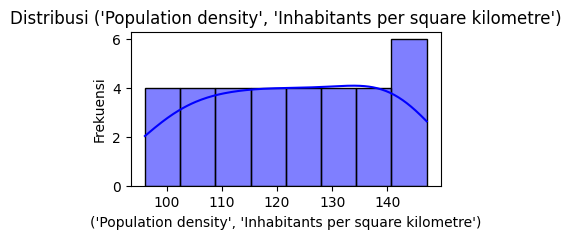

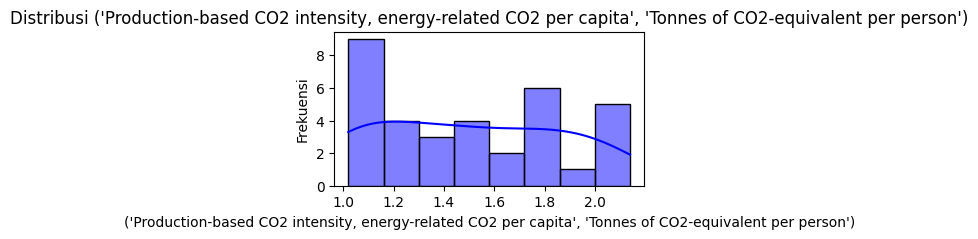

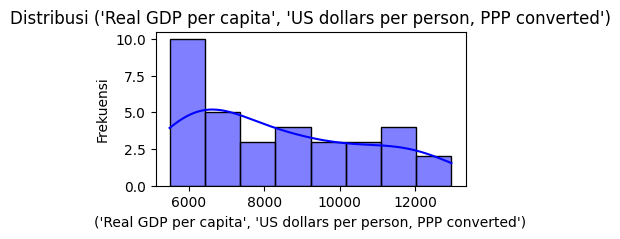

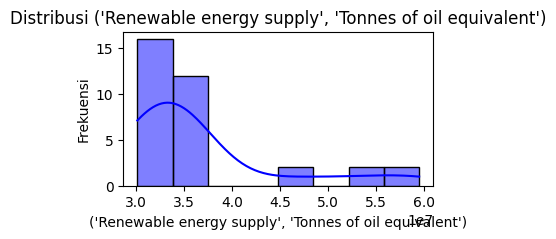

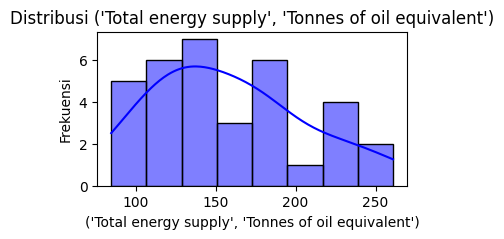

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(pivot_df_cleaned[col], kde=True, bins=8, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

**Penjelasan Kode :**

Kode ini digunakan untuk membuat grafik distribusi data untuk setiap kolom numerik yang ada di data frame `pivot_df_cleaned`. Setiap kolom numerik yang
terdapat pada daftar `numerical_cols` akan diproses secara berulang menggunakan loop for.

Untuk setiap kolom numerik `(col)`, pertama-tama dibuatlah sebuah grafik baru dengan ukuran figure 4x2 inci.
Kemudian, digunakan fungsi `sns.histplot()` dari Seaborn untuk membuat histogram distribusi data, dengan parameter `kde=True` untuk menambahkan garis distribusi kernel density estimation (KDE) yang halus, `bins=8` untuk menentukan jumlah bin pada histogram, dan `color='blue'` untuk memberikan warna biru pada grafik.
Judul grafik diatur menggunakan `plt.title()` dengan menyisipkan nama kolom yang sedang diproses.
Sumbu X diberi label sesuai nama kolom menggunakan `plt.xlabel()`, dan sumbu Y diberi label "Frekuensi" menggunakan `plt.ylabel()`.
Terakhir, grafik ditampilkan dengan `plt.show()`.

**Insight :**

1. Kepadatan Penduduk di Indonesia : Grafik menunjukkan bahwa kepadatan penduduk Indonesia relatif stabil di kisaran 100-130 penduduk per kilometer persegi, namun ada lonjakan mendekati 140 penduduk per kilometer persegi. Ini mengindikasikan bahwa meskipun sebagian besar wilayah memiliki kepadatan yang merata, beberapa daerah cenderung memiliki kepadatan yang lebih tinggi.

2. Emisi CO2 per Kapita (Production-based CO2 intensity) : Grafik menunjukkan bahwa sebagian besar nilai emisi CO2 per kapita di Indonesia berada di kisaran 1.0 hingga 1.2 ton per orang, dengan penurunan frekuensi pada nilai yang lebih tinggi. Nilai lebih besar dari 1.2 ton cukup jarang ditemukan.

3. GDP per Kapita : Grafik ini menunjukkan bahwa GDP per kapita Indonesia lebih sering berada di sekitar 6000 dolar per orang, dan menurun dengan frekuensi lebih rendah di kisaran 8000 hingga 12000 dolar. Ini menggambarkan konsentrasi GDP di Indonesia yang relatif lebih rendah dibandingkan dengan standar internasional.

4. Pasokan Energi Terbarukan : Grafik distribusi pasokan energi terbarukan menunjukkan bahwa sebagian besar nilai pasokan berada di kisaran 3 hingga 3,5 "tonnes of oil equivalent", dengan penurunan frekuensi pada nilai yang lebih tinggi. Hal ini menunjukkan bahwa pasokan energi terbarukan masih terbatas.

5. Total Pasokan Energi : Grafik ini menunjukkan bahwa total pasokan energi di Indonesia sering berada di kisaran 150 hingga 200 "tonnes of oil equivalent", dengan sedikit frekuensi pada nilai yang lebih rendah atau lebih tinggi. Ini menunjukkan bahwa pasokan energi Indonesia cenderung stabil pada rentang tersebut.

**Identifikasi Hubungan Linier dan Non-Linear**

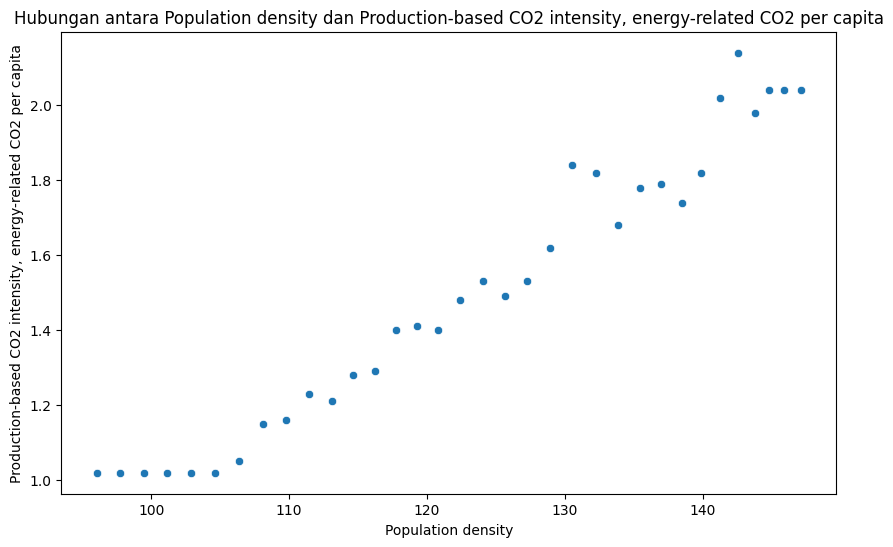

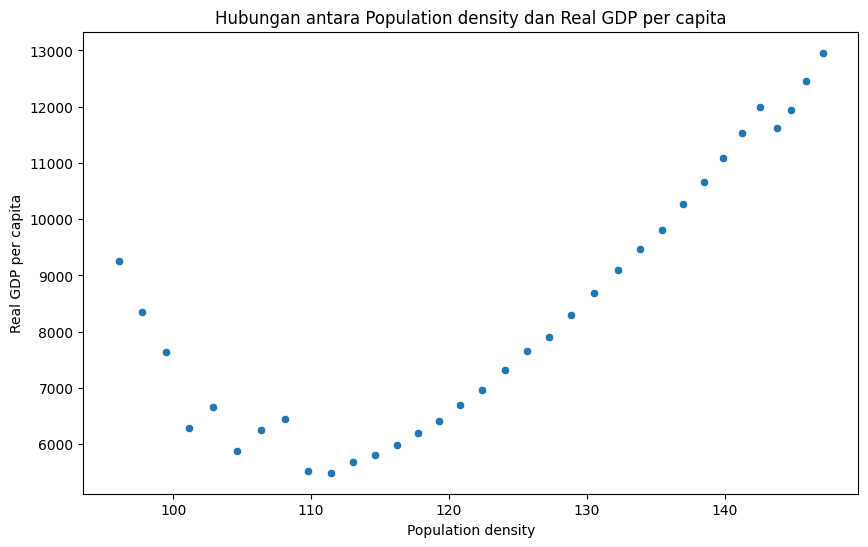

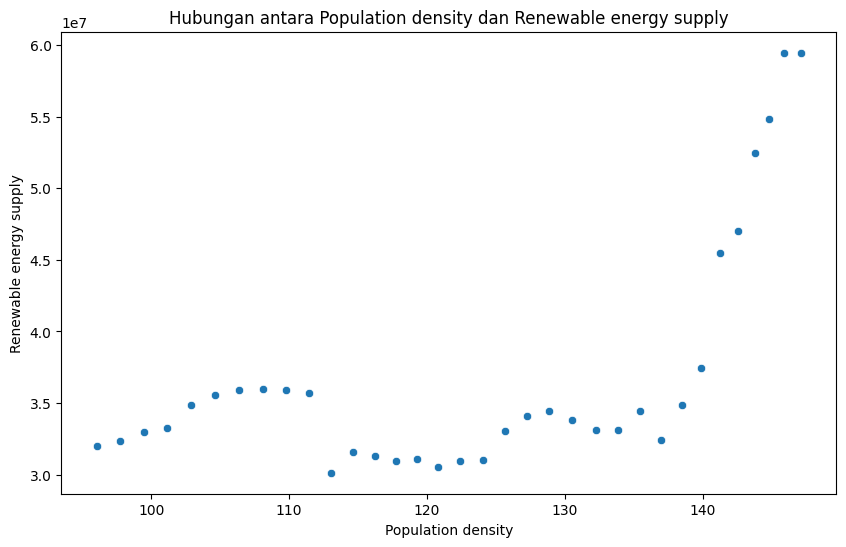

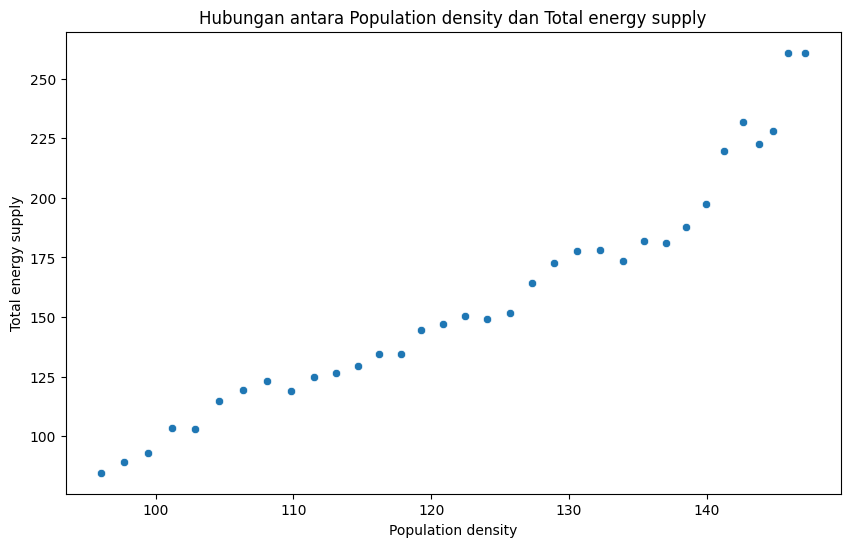

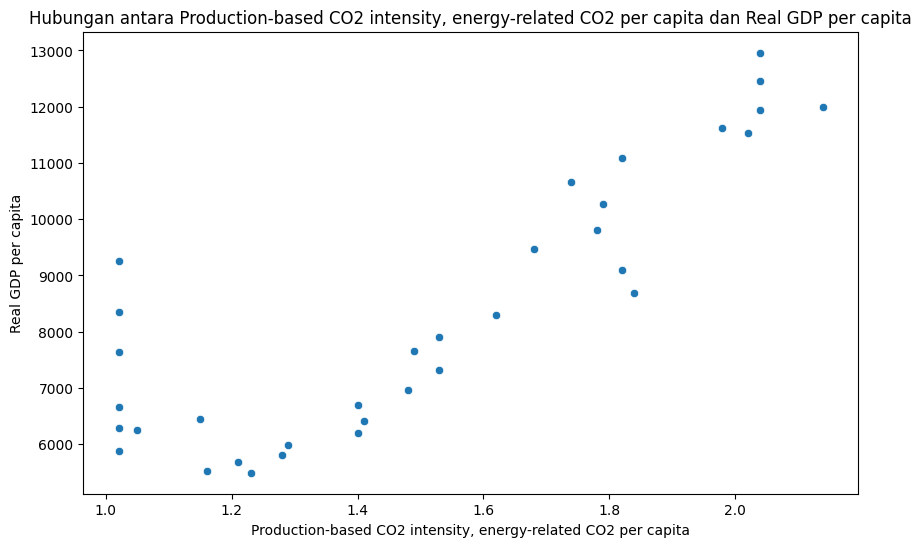

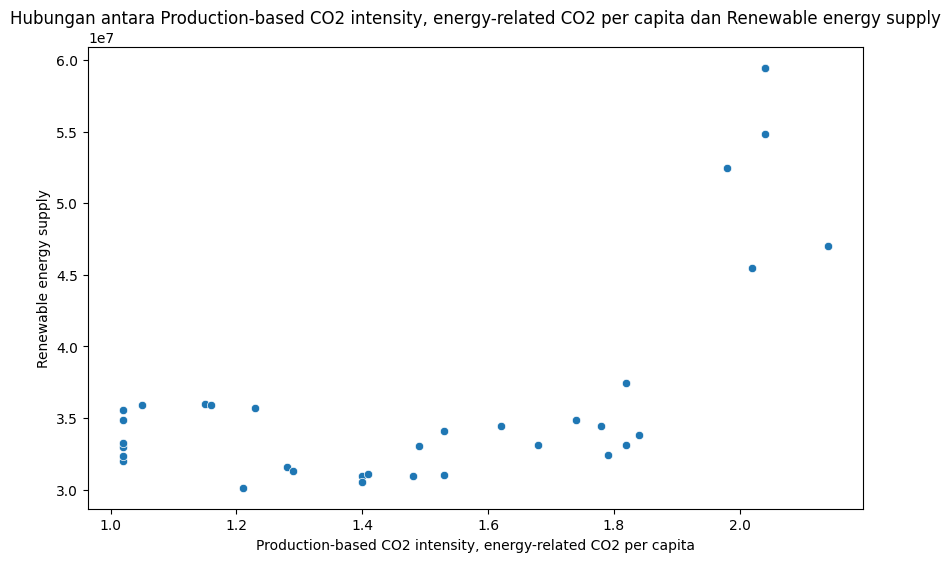

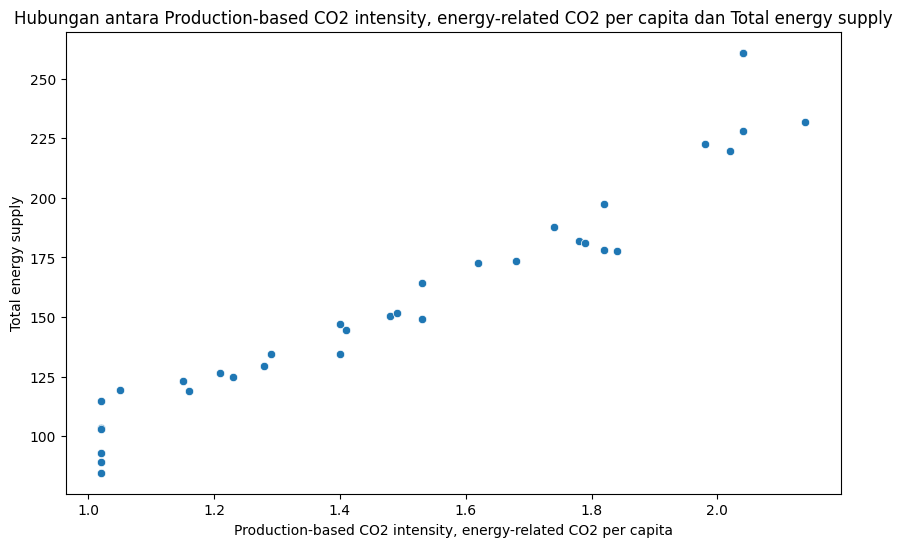

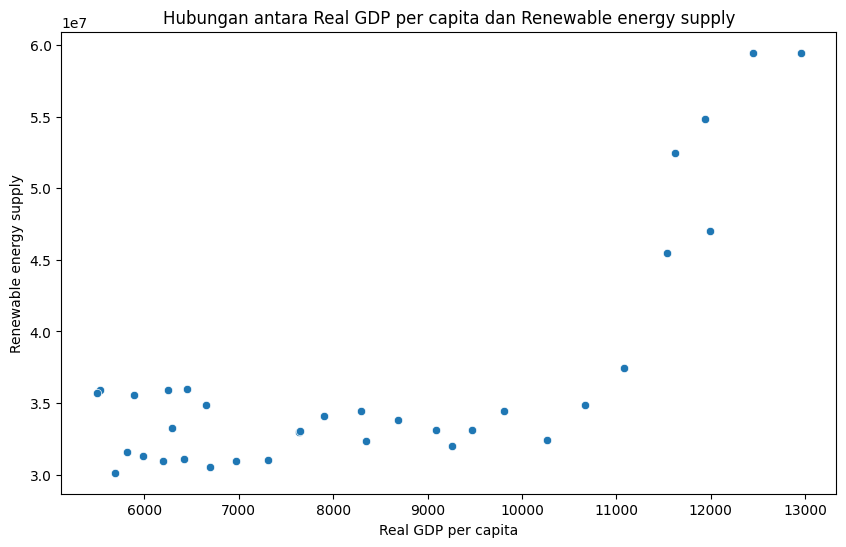

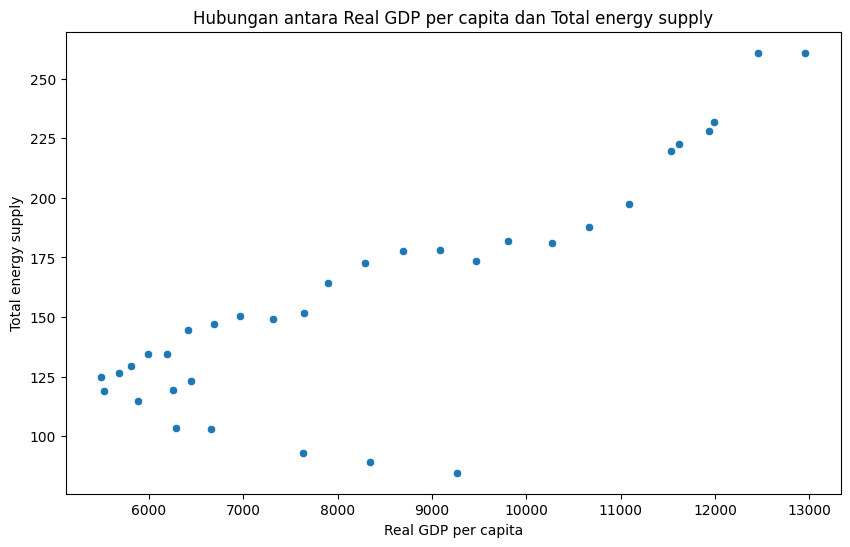

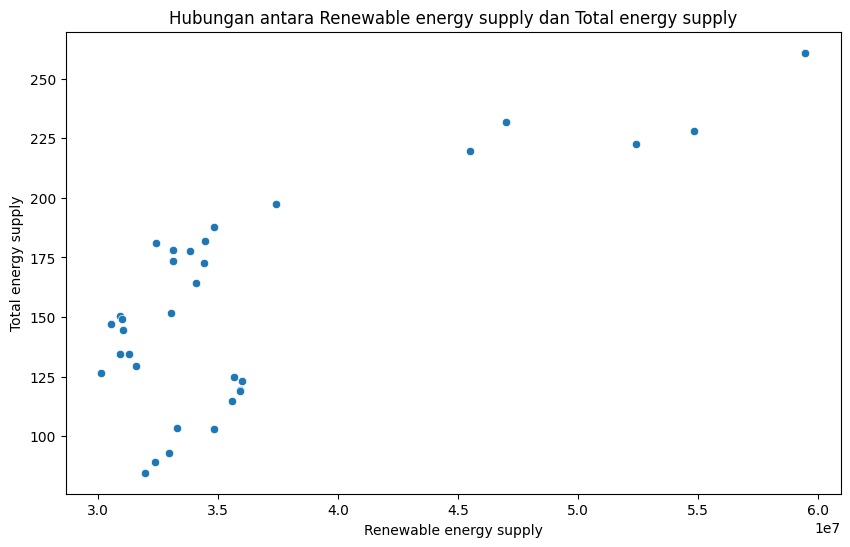

In [ ]:
# Daftar measures yang ingin dianalisis (dengan nama dan satuan)
measures = [
    ('Population density', 'Inhabitants per square kilometre'),
    ('Production-based CO2 intensity, energy-related CO2 per capita', 'Tonnes of CO2-equivalent per person'),
    ('Real GDP per capita', 'US dollars per person, PPP converted'),
    ('Renewable energy supply', 'Tonnes of oil equivalent'),
    ('Total energy supply', 'Tonnes of oil equivalent')
]

# Membuat scatter plot untuk setiap pasangan measure
for i in range(len(measures)):
    for j in range(i + 1, len(measures)):
        # Menyiapkan subplot
        plt.figure(figsize=(10, 6))

        # Menampilkan scatter plot untuk dua measure
        sns.scatterplot(
            data=pivot_df_cleaned,
            x=pivot_df_cleaned[measures[i]],  # Mengakses kolom menggunakan tuple
            y=pivot_df_cleaned[measures[j]]  # Mengakses kolom menggunakan tuple
        )

        # Menambahkan judul dan label
        plt.title(f'Hubungan antara {measures[i][0]} dan {measures[j][0]}')
        plt.xlabel(measures[i][0])
        plt.ylabel(measures[j][0])

        # Menampilkan plot
        plt.show()

**Penjelasan Kode :**

Kode ini dimulai dengan mendefinisikan daftar measures yang berisi pasangan nama dan satuan untuk lima metrik yang akan dianalisis. Setiap item dalam daftar ini adalah tuple, misalnya 'Population density' dengan satuannya 'Inhabitants per square kilometre'. Kemudian, untuk setiap kombinasi pasangan measures, dilakukan perulangan dua kali, yang pertama `(i)` untuk mengakses metrik pertama dan yang kedua `(j)` untuk mengakses metrik berikutnya setelahnya.

Di dalam loop, subplot dengan ukuran 10x6 disiapkan untuk menampilkan scatter plot dari dua metrik. Scatter plot ini dibuat menggunakan fungsi `sns`.scatterplot, dengan data yang diambil dari `pivot_df_cleaned` dan mengakses kolom dataframe menggunakan tuple dari `measures[i]` dan `measures[j]`. Plot diberi judul yang menjelaskan hubungan antar dua metrik, serta diberi label sumbu x dan y sesuai nama metrik yang dibandingkan. Setelah itu, scatter plot ditampilkan menggunakan plt.show().

Kode ini menghasilkan scatter plot untuk setiap pasangan metrik yang ada dalam daftar measures, memungkinkan visualisasi hubungan antara berbagai indikator yang dianalisis.

**Insight :**
1. Menunjukkan tren peningkatan intensitas emisi CO2 per kapita seiring dengan peningkatan kepadatan penduduk. Korelasi Positif, ada hubungan langsung antara kepadatan penduduk dan emisi CO2. Semakin padat penduduknya, semakin tinggi emisi CO2. Tren Linear, hubungannya cenderung linear, meski ada beberapa variasi. Ini mengindikasikan peningkatan kepadatan penduduk konsisten diikuti peningkatan emisi.

2. Menunjukkan tren peningkatan PDB per kapita seiring dengan peningkatan kepadatan penduduk hingga titik tertentu, kemudian cenderung melandai. Korelasi Positif, pada awalnya, ada hubungan positif antara kepadatan penduduk dan PDB per kapita. Artinya, peningkatan kepadatan penduduk cenderung diikuti dengan peningkatan pendapatan per kapita. Non-Linearitas, hubungan ini tidak sepenuhnya linear. Setelah mencapai titik tertentu, peningkatan kepadatan penduduk tidak lagi diikuti dengan peningkatan yang signifikan pada PDB per kapita. Ini menunjukkan adanya titik jenuh atau efek negatif dari kepadatan penduduk yang terlalu tinggi.

3. Menunjukkan tren peningkatan pasokan energi terbarukan seiring dengan peningkatan kepadatan penduduk hingga titik tertentu, kemudian cenderung stagnan. Korelasi Positif, pada awalnya, ada hubungan positif antara kepadatan penduduk dan pasokan energi terbarukan. Artinya, peningkatan kepadatan penduduk cenderung diikuti dengan peningkatan pasokan energi terbarukan. Non-Linearitas, hubungan ini tidak sepenuhnya linear. Setelah mencapai titik tertentu, peningkatan kepadatan penduduk tidak lagi diikuti dengan peningkatan yang signifikan pada pasokan energi terbarukan. Ini menunjukkan adanya titik jenuh atau faktor lain yang membatasi peningkatan pasokan energi terbarukan.

4. Menunjukkan tren peningkatan pasokan energi total seiring dengan peningkatan kepadatan penduduk. Korelasi Positif, ada hubungan langsung antara kepadatan penduduk dan pasokan energi total. Semakin padat penduduknya, semakin tinggi kebutuhan akan energi, sehingga pasokan energi total juga cenderung meningkat. Tren Linear, hubungannya cenderung linear, meski ada beberapa variasi. Ini mengindikasikan peningkatan kepadatan penduduk konsisten diikuti peningkatan pasokan energi total.

5. Menunjukkan tren peningkatan PDB per kapita seiring dengan peningkatan intensitas emisi CO2. Korelasi Positif, ada hubungan langsung antara intensitas emisi CO2 dan PDB per kapita. Semakin tinggi emisi CO2, semakin tinggi pula PDB per kapita. Tren Linear, hubungannya cenderung linear, meski ada beberapa variasi. Ini mengindikasikan peningkatan emisi CO2 konsisten diikuti peningkatan PDB per kapita.

6. Menunjukkan tren peningkatan pasokan energi terbarukan seiring dengan peningkatan intensitas emisi CO2. Korelasi Positif, ada hubungan langsung antara intensitas emisi CO2 dan pasokan energi terbarukan. Semakin tinggi emisi CO2, semakin tinggi pula pasokan energi terbarukan. Namun, hubungan ini tidak sepenuhnya linear. Terdapat beberapa titik data yang menyimpang dari tren umum. Ini menunjukkan bahwa faktor lain selain intensitas CO2 juga berperan dalam menentukan tingkat pasokan energi terbarukan suatu negara.

7. Menunjukkan tren peningkatan total pasokan energi seiring dengan peningkatan intensitas emisi CO2. Hubungan Linier Positif, terdapat hubungan linier yang kuat antara intensitas emisi CO2 dan total pasokan energi. Artinya, semakin tinggi tingkat emisi CO2 suatu negara, maka semakin besar pula total pasokan energinya.

8. Menunjukkan tren peningkatan pasokan energi terbarukan seiring dengan peningkatan PDB per kapita. Hubungan Positif, terdapat hubungan positif antara PDB per kapita dan pasokan energi terbarukan. Artinya, negara dengan pendapatan per kapita yang lebih tinggi cenderung memiliki pasokan energi terbarukan yang lebih besar. Non-Linearitas, hubungan ini tidak sepenuhnya linear. Pada awalnya, peningkatan PDB per kapita diiringi dengan peningkatan yang signifikan pada pasokan energi terbarukan. Namun, setelah mencapai titik tertentu, peningkatan PDB per kapita tidak lagi diikuti dengan peningkatan yang signifikan pada pasokan energi terbarukan. Ini mengindikasikan adanya faktor lain yang membatasi peningkatan pasokan energi terbarukan.

9. Menunjukkan tren peningkatan total pasokan energi seiring dengan peningkatan PDB per kapita. Hubungan Linier Positif, terdapat hubungan linier yang kuat antara PDB per kapita dan total pasokan energi. Artinya, semakin tinggi pendapatan per kapita suatu negara, maka semakin besar pula total pasokan energinya.

10. Menunjukkan tren peningkatan total pasokan energi seiring dengan peningkatan pasokan energi terbarukan. Hubungan Linier Positif, terdapat hubungan linier yang kuat antara pasokan energi terbarukan dan total pasokan energi. Artinya, semakin besar kontribusi energi terbarukan dalam bauran energi suatu negara, maka semakin besar pula total pasokan energinya.

**Analisis Korelasi Antar Variabel**

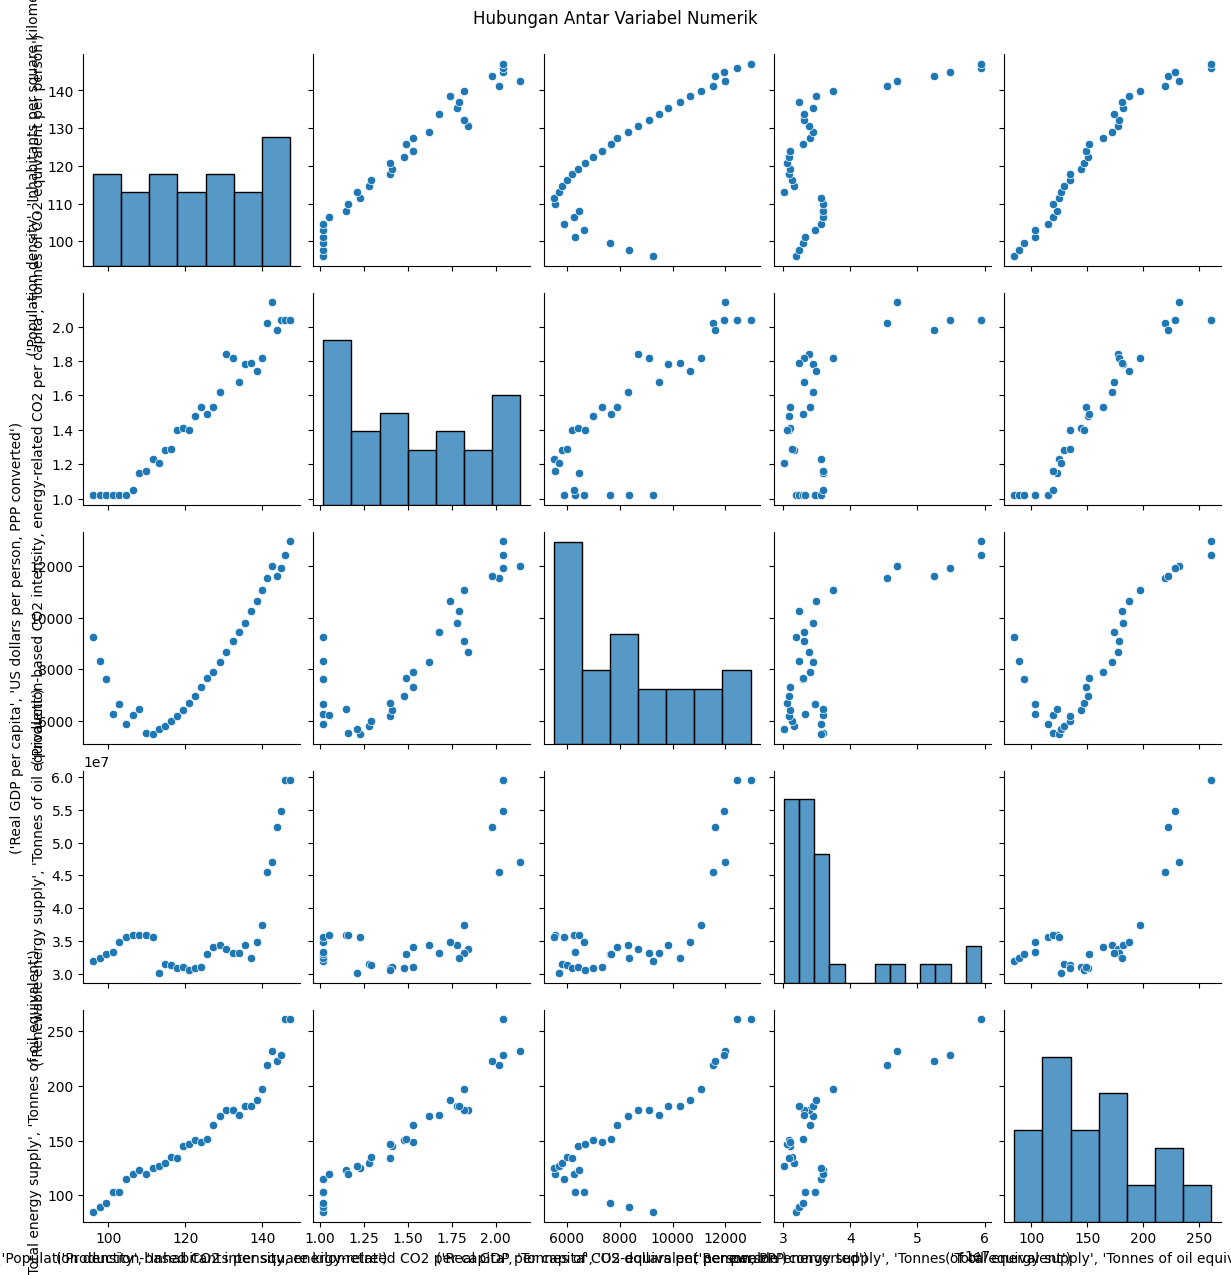

In [ ]:
sns.pairplot(pivot_df_cleaned[numerical_cols])
plt.suptitle('Hubungan Antar Variabel Numerik', y=1.02)
plt.show()

**Penjelasan Kode :**

`sns.pairplot(pivot_df_cleaned[numerical_cols])` : Kode ini membuat pairplot untuk kolom-kolom numerik yang ada pada dataset `pivot_df_cleaned`, yang ditentukan dalam variabel `numerical_cols`. Fungsi `pairplot()` dari `Seaborn` menghasilkan scatterplot untuk setiap pasangan variabel numerik, sehingga kita dapat melihat hubungan antar setiap variabel dalam dataset. Selain itu, diagonal plot akan menampilkan distribusi data untuk setiap variabel.

`plt.suptitle('Hubungan Antar Variabel Numerik', y=1.02)` : Fungsi ini memberi judul pada plot yang dihasilkan. Judulnya adalah "Hubungan Antar Variabel Numerik", dan posisi judul diatur pada nilai `y=1.02` untuk memastikan bahwa judulnya terletak sedikit lebih tinggi dari posisi default agar tidak menutupi grafik.

`plt.show()` : Fungsi ini menampilkan plot yang telah dibuat di langkah sebelumnya. Setelah semua konfigurasi selesai, grafik akan ditampilkan di layar.

**Insight :**

1. Kepadatan Penduduk dan Emisi CO2 per Kapita : Terdapat korelasi positif yang cukup jelas antara kepadatan penduduk dan emisi CO2 per kapita, dengan kenaikan kepadatan penduduk seringkali berbanding lurus dengan peningkatan emisi CO2 per kapita. Grafik menunjukkan bahwa negara dengan kepadatan penduduk tinggi cenderung memiliki tingkat emisi yang lebih tinggi per individu.

2. Kepadatan Penduduk dan GDP per Kapita : Terdapat hubungan yang cenderung meningkat antara kepadatan penduduk dan GDP per kapita, meskipun hubungan ini tidak terlalu kuat. Negara dengan kepadatan penduduk yang lebih tinggi cenderung memiliki GDP per kapita yang lebih tinggi, namun distribusinya tampak tersebar dengan adanya variasi yang lebih besar pada kepadatan penduduk lebih rendah.

3. Emisi CO2 per Kapita dan GDP per Kapita : Terlihat hubungan positif yang cukup kuat antara emisi CO2 per kapita dan GDP per kapita. Ini menunjukkan bahwa negara dengan GDP yang lebih tinggi cenderung menghasilkan lebih banyak emisi CO2 per kapita, mungkin karena lebih banyak aktivitas industri dan konsumsi energi.

4. GDP per Kapita dan Pasokan Energi Terbarukan : Grafik ini menunjukkan hubungan yang lebih kompleks antara GDP per kapita dan pasokan energi terbarukan. Negara dengan GDP lebih tinggi tampaknya memiliki variasi lebih besar dalam pasokan energi terbarukan, menunjukkan ketergantungan pada berbagai sumber energi.

5. Pasokan Energi Terbarukan dan Total Pasokan Energi : Terdapat hubungan positif antara pasokan energi terbarukan dan total pasokan energi. Negara yang lebih banyak mengandalkan energi terbarukan juga cenderung memiliki pasokan energi yang lebih besar secara keseluruhan. Grafik ini menunjukkan potensi untuk lebih memperbanyak penggunaan energi terbarukan untuk memenuhi kebutuhan energi global.

Secara keseluruhan, grafik ini memberikan wawasan penting tentang bagaimana berbagai variabel numerik saling berhubungan, dan dapat memberikan petunjuk tentang tantangan dan peluang dalam mengelola kepadatan penduduk, emisi CO2, dan kebutuhan energi di negara Indonesia.

## 5. Korelasi Antar Measure Menggunakan Heatmap

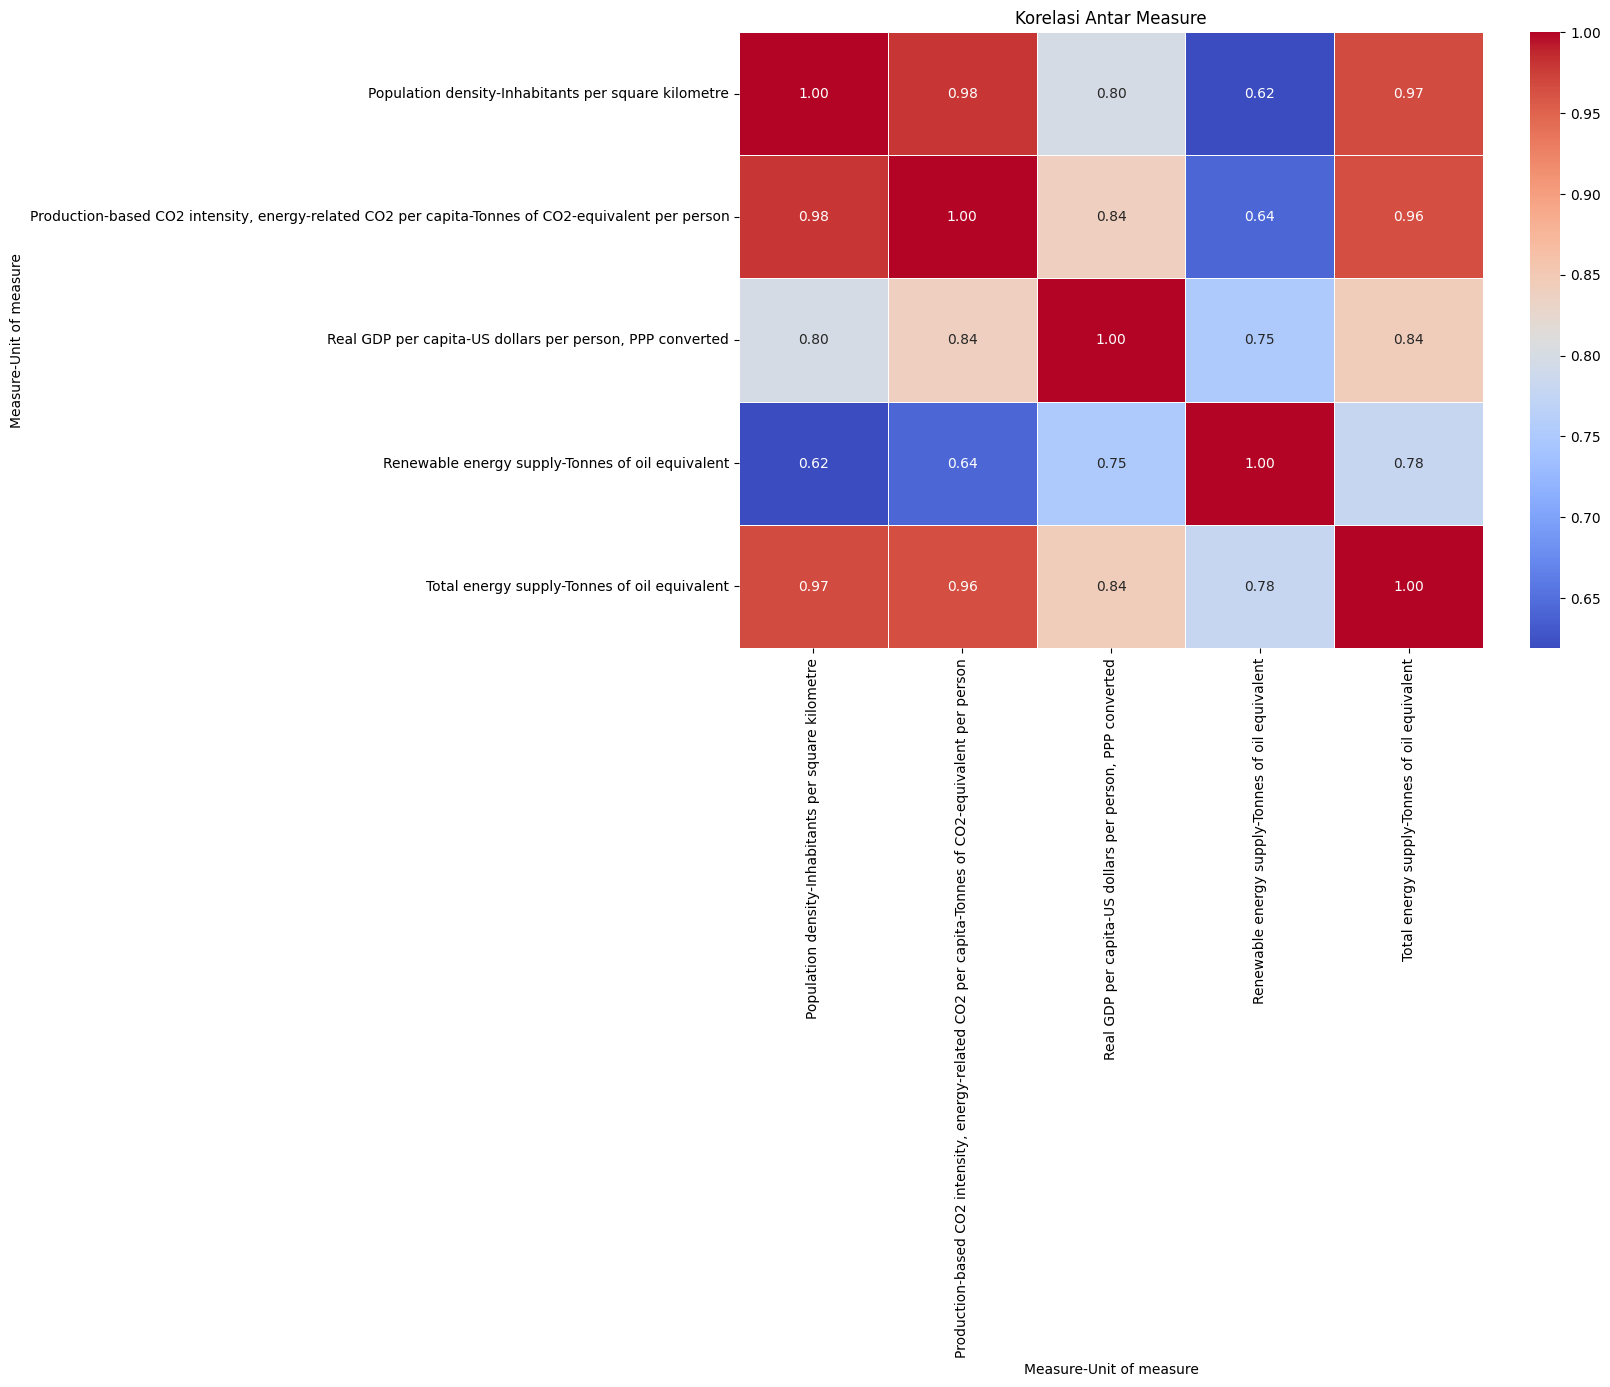

In [ ]:
# Daftar measures yang ingin dianalisis (hanya ambil nama pertama dari tuple MultiIndex)
measures = [
    ('Population density', 'Inhabitants per square kilometre'),
    ('Production-based CO2 intensity, energy-related CO2 per capita', 'Tonnes of CO2-equivalent per person'),
    ('Real GDP per capita', 'US dollars per person, PPP converted'),
    ('Renewable energy supply', 'Tonnes of oil equivalent'),
    ('Total energy supply', 'Tonnes of oil equivalent')
]


# Menghitung korelasi antar measure (berdasarkan tuple MultiIndex)
df_pivoted = pivot_df_cleaned[measures]

# Menghitung korelasi antar measure
correlation_matrix = df_pivoted.corr()

# Membuat heatmap untuk korelasi antar measure
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Korelasi Antar Measure')

# Menampilkan heatmap
plt.show()

**Penjelasan Kode :**

Kode ini bertujuan untuk menghitung korelasi antar beberapa measure dan menampilkannya dalam bentuk heatmap. Pertama, didefinisikan daftar measures yang berisi tuple dari MultiIndex yang terdiri dari nama-nama measure dan satuannya. Lalu, dataframe `pivot_df_cleaned` difilter berdasarkan measure-measure tersebut untuk membuat dataframe baru bernama `df_pivoted`. Setelah itu, korelasi antar measure dihitung menggunakan metode `.corr()` yang menghasilkan matriks korelasi, di mana setiap sel mewakili korelasi antara dua measure. Dengan menggunakan `sns.heatmap()`, heatmap dibuat dari matriks korelasi ini, dan heatmap ditampilkan dengan penjelasan nilai korelasi di setiap selnya `(annot=True)` serta menggunakan skema warna coolwarm. Terakhir, plot heatmap ditampilkan dengan judul "Korelasi Antar Measure" di atasnya.

**Insight :**

1. Korelasi Tinggi : Terdapat korelasi yang sangat kuat antara Population density dan Production-based CO2 intensity (0.98), serta antara Total energy supply dan Production-based CO2 intensity (0.97). Ini menunjukkan bahwa daerah dengan kepadatan populasi yang lebih tinggi cenderung memiliki emisi CO2 per kapita yang lebih tinggi dan kebutuhan pasokan energi yang lebih besar.

2. Hubungan Ekonomi dan Energi : Terdapat korelasi yang kuat antara Real GDP per capita dan Total energy supply (0.84), yang menunjukkan bahwa negara dengan output ekonomi yang lebih tinggi cenderung membutuhkan lebih banyak energi.

3. Energi Terbarukan : Korelasi antara Renewable energy supply dan variabel lainnya lebih rendah. Misalnya, korelasinya dengan Population density hanya 0.62, yang menunjukkan bahwa pasokan energi terbarukan tidak berhubungan langsung dengan kepadatan populasi atau emisi CO2.

4. Hubungan Energi dan Ekonomi : Korelasi antara Renewable energy supply dan Real GDP per capita juga lebih rendah dibandingkan dengan hubungan antara Total energy supply dan GDP (0.75 vs 0.84). Ini menunjukkan bahwa meskipun energi terbarukan penting, kontribusinya terhadap ekonomi mungkin belum sebesar pasokan energi total.

Secara keseluruhan, heatmap ini menunjukkan bahwa negara Indonesia dengan kepadatan populasi dan output ekonomi yang lebih tinggi cenderung memiliki emisi CO2 dan kebutuhan pasokan energi yang lebih besar. Namun, hubungan dengan pasokan energi terbarukan relatif lemah, yang mengindikasikan bahwa energi terbarukan mungkin belum menjadi faktor utama dalam pertumbuhan ekonomi dan emisi CO2.

In [ ]:
# Korelasi
correlation = pivot_df_cleaned.corr()
print("Korelasi terhadap Real GDP per Capita:")
print(correlation['Real GDP per capita','US dollars per person, PPP converted'].sort_values(ascending=False))

Korelasi terhadap Real GDP per Capita:
Measure                                                        Unit of measure                     
Real GDP per capita                                            US dollars per person, PPP converted    1.000000
Total energy supply                                            Tonnes of oil equivalent                0.843569
Production-based CO2 intensity, energy-related CO2 per capita  Tonnes of CO2-equivalent per person     0.840831
Population density                                             Inhabitants per square kilometre        0.798228
Renewable energy supply                                        Tonnes of oil equivalent                0.751133
Name: (Real GDP per capita, US dollars per person, PPP converted), dtype: float64


Kami memilih Real GDP per capita sebagai variabel dependen dikarenakan kami ingin meramal Real GDP per capita di masa depan yang disesuaikan dengan topik green economy

# **(3) Modelling (Forecasting: Time Series)**

## **Splitting Data**

In [ ]:
pivot_df_cleaned.reset_index(inplace=True)
pivot_df_cleaned['TIME_PERIOD'] = pd.to_datetime(pivot_df_cleaned['TIME_PERIOD'], format='%Y')
pivot_df_cleaned.set_index('TIME_PERIOD', inplace=True)
pivot_df_cleaned.drop(['Reference area'], axis=1, inplace=True)

<ipython-input-72-58a9d38e04e1>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pivot_df_cleaned.drop(['Reference area'], axis=1, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data menjadi 90% training dan 10% testing
train_size = int(len(pivot_df_cleaned) * 0.9)
train, test = pivot_df_cleaned[:train_size], pivot_df_cleaned[train_size:]

print("Training data:")
print(len(train))
print("\nTesting data:")
print(len(test))

Training data:
30

Testing data:
4


In [ ]:
train.index

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='TIME_PERIOD', freq=None)

In [ ]:
test.index

DatetimeIndex(['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01'], dtype='datetime64[ns]', name='TIME_PERIOD', freq=None)

In [ ]:
print(train.columns)

MultiIndex([(                                           'Population density', ...),
            ('Production-based CO2 intensity, energy-related CO2 per capita', ...),
            (                                          'Real GDP per capita', ...),
            (                                      'Renewable energy supply', ...),
            (                                          'Total energy supply', ...)],
           names=['Measure', 'Unit of measure'])


## **Plot Data Train Variabel Target Untuk Melihat Adanya Sifat Tren Atau Tidak**

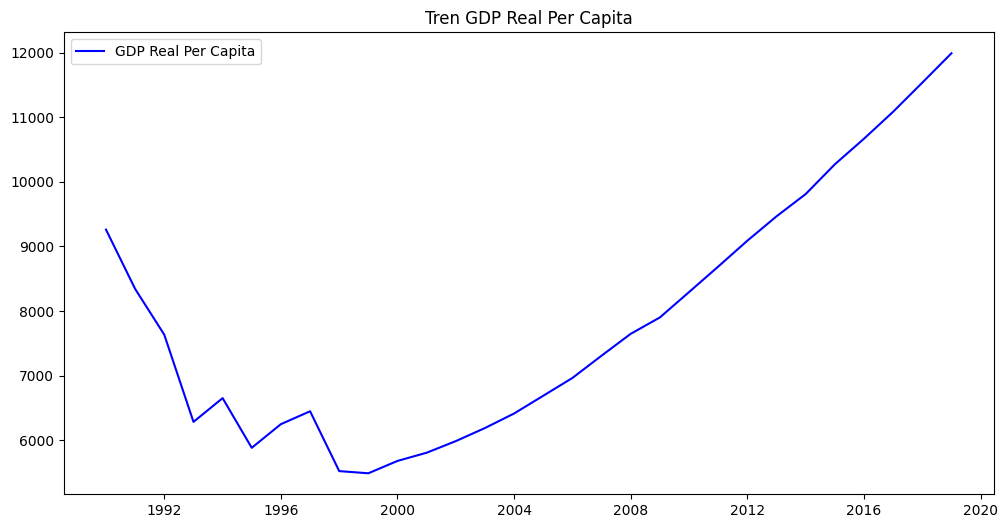

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train['Real GDP per capita'], label='GDP Real Per Capita', color='blue')
plt.title("Tren GDP Real Per Capita")
plt.legend()
plt.show()

Dari pola ini, data GDP Real Per Kapita tampak tidak stasioner, dengan tren kenaikan yang signifikan. Oleh karena itu, sebelum diterapkan ke dalam model forecasting, diperlukan transformasi data, seperti differencing, untuk menghilangkan tren dan menjadikannya stasioner. Setelah transformasi dilakukan, model dapat digunakan untuk memprediksi tren GDP Real Per Kapita di masa mendatang, dengan mempertimbangkan dinamika pertumbuhan ekonomi dan dampak dari faktor-faktor eksternal.

## **Pembuatan Model Forecasting Time Series**

Model Forecasting Time Series yang akan dicoba, yaitu:
- ARIMA
- ARIMAX

### **Model ARIMA**

### **Melihat Stasioneritas Tren**

Uji Stasioneritas ini dilakukan dengan ADF Test untuk memastikan apakah data perlu diferensiasi sebelum pemodelan.

* **Uji Augmented Dickey Fuller (Uji ADF)** adalah uji statistik umum yang digunakan untuk menguji apakah suatu deret waktu (time series) bersifat stasioner atau tidak. Uji ini merupakan salah satu uji statistik yang paling umum digunakan untuk menganalisis stasioner suatu deret.

In [ ]:
def test_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("Data stasioner (H0 ditolak).")
    else:
        print("Data tidak stasioner (H0 diterima).")

print(f"Uji ADF untuk kolom '{'Real GDP per capita'}':")
test_stationarity(train['Real GDP per capita'])

Uji ADF untuk kolom 'Real GDP per capita':
ADF Statistic: 1.437591828998962
p-value: 0.997278400241922
Data tidak stasioner (H0 diterima).


Karena masih belum stasioner, maka diperlukan penerapan differencing

### **Mengatasi Stasioneritas**

In [ ]:
# differencing
diff_train = train.diff(1).dropna()

# Uji kembali stasionaritas setelah differencing
test_stationarity(diff_train['Real GDP per capita'])

ADF Statistic: -6.239695469182808
p-value: 4.7302852010766764e-08
Data stasioner (H0 ditolak).


Karena differencing 1 sudah membuat data stasioner, maka parameter d = 1.

### **Mengukur korelasi dengan menggunakan ACF dan PACF**

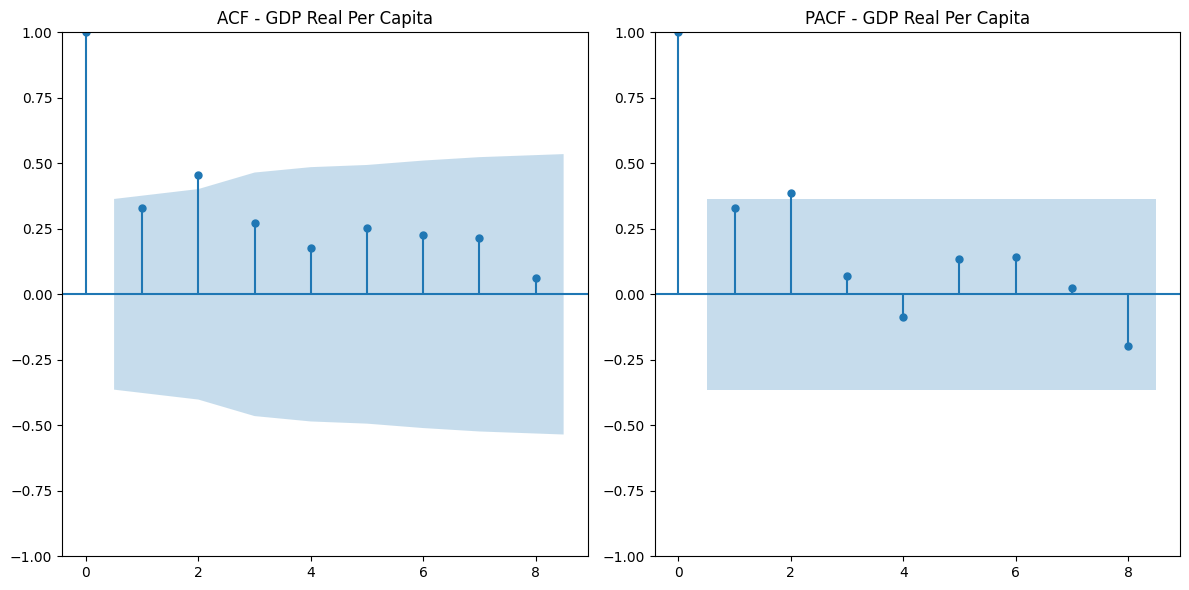

In [ ]:
# Mengukur Korelasi dengan ACF dan PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_train['Real GDP per capita'], lags=8, ax=plt.gca())
plt.title("ACF - GDP Real Per Capita")

plt.subplot(122)
plot_pacf(diff_train['Real GDP per capita'], lags=8, ax=plt.gca())
plt.title("PACF - GDP Real Per Capita")
plt.tight_layout()
plt.show()

Dapat dilihat pada grafik ACF dan PACF diasumsikan sebagai cuts off, dan parameter (p,q) = (2,2) karena titik yang berada di luar kotak biru adalah lag ke-2 untuk kedua grafik. Pada grafik tersebut juga tidak menunjukkan adanya pola musiman.

### **ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

MAE (Mean Absolute Error): 356.6034888068298
RMSE (Root Mean Squared Error): 402.162175535559
MAPE (Mean Absolute Percentage Error): 2.958669959724348%


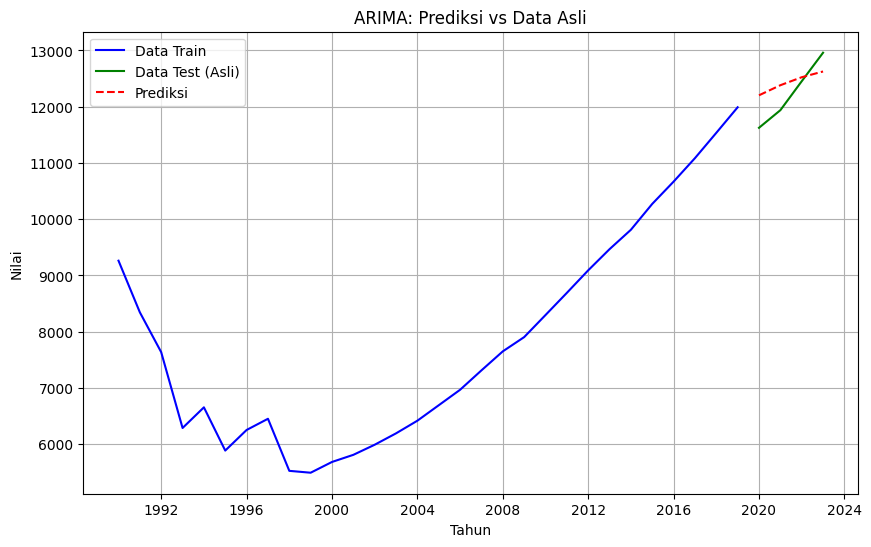

Prediksi: [12201.69472129302, 12380.964264554475, 12522.975106899234, 12625.160137519411]
Data Asli: Unit of measure  US dollars per person, PPP converted
TIME_PERIOD                                          
2020-01-01                                   11624.00
2021-01-01                                   11937.30
2022-01-01                                   12451.47
2023-01-01                                   12958.71


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Melatih model ARIMA pada data train
model = ARIMA(train['Real GDP per capita'], order=(2, 1, 2)) # menyesuaikan parameter ARIMA berdasarkan analisis sebelumnya
fitted_model = model.fit()

# Prediksi pada data test
predictions = fitted_model.forecast(steps=len(test['Real GDP per capita']))

# Evaluasi Model: MAE, RMSE, MAPE
mae = mean_absolute_error(test['Real GDP per capita'], predictions)
rmse = np.sqrt(mean_squared_error(test['Real GDP per capita'], predictions))
mape = mean_absolute_percentage_error(test['Real GDP per capita'], predictions) * 100  # MAPE dalam persen

# Tampilkan hasil evaluasi
print(f'MAE (Mean Absolute Error): {mae}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}%')

# Visualisasi prediksi vs data asli
plt.figure(figsize=(10, 6))
# Plot data train
plt.plot(train.index, train['Real GDP per capita'], label='Data Train', color='blue')
# Plot data test (asli)
plt.plot(test.index, test['Real GDP per capita'], label='Data Test (Asli)', color='green')
# Plot prediksi
plt.plot(predictions.index, predictions, label='Prediksi', color='red', linestyle='--')

plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.title('ARIMA: Prediksi vs Data Asli')
plt.legend()
plt.grid(True)
plt.show()

# Output prediksi dan data asli untuk verifikasi
print("Prediksi:", predictions.tolist())
print("Data Asli:", test['Real GDP per capita'])

Nilai MAPE < 5% menandakan model cukup baik dalam meramal data masa depan, hal ini bisa disebabkan data yang sangat kecil sehingga tidak bisa menjadi sangat baik dalam meramal data masa depan

#### **Learning Curves ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

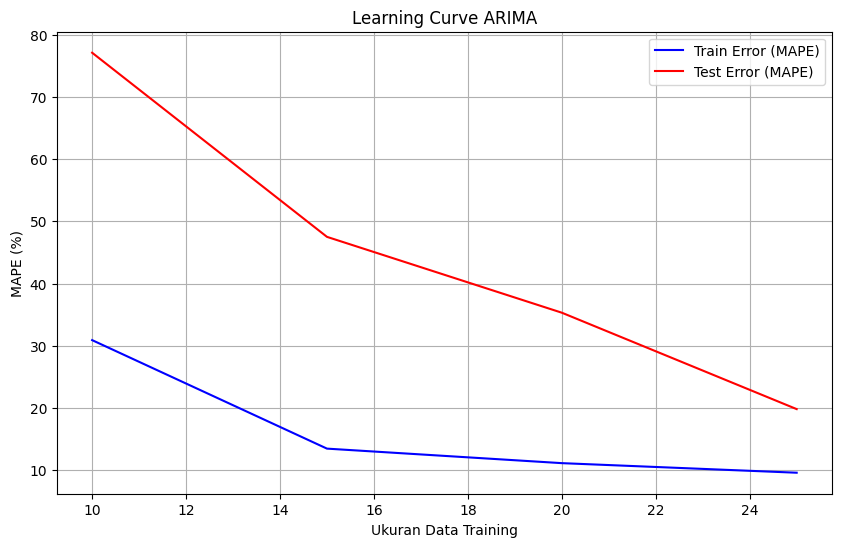

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung MAPE
def calculate_mape(true, pred):
    return mean_absolute_percentage_error(true, pred) * 100

# Inisialisasi list untuk menyimpan hasil
train_sizes = []
train_errors = []
test_errors = []

# Iterasi dengan subset data training
for i in range(10, len(train), 5):  # Gunakan ukuran data train bertahap
    train_sizes.append(i)

    # Subset data train
    train_subset = train.iloc[:i]

    # Latih model ARIMAX pada subset
    model = ARIMA(train_subset['Real GDP per capita'],
                  order=(2, 1, 2))  # Sesuaikan parameter
    fitted_model = model.fit()

    # Prediksi pada data train subset
    train_pred = fitted_model.predict(start=0, end=i - 1,)
    train_true = train_subset['Real GDP per capita']

    # Hitung error pada data train subset
    train_mape = calculate_mape(train_true, train_pred)
    train_errors.append(train_mape)

    # Prediksi pada data test
    test_pred = fitted_model.forecast(steps=len(test['Real GDP per capita']))
    test_true = test['Real GDP per capita']

    # Hitung error pada data test
    test_mape = calculate_mape(test_true, test_pred)
    test_errors.append(test_mape)

# Visualisasi learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Train Error (MAPE)', color='blue')
plt.plot(train_sizes, test_errors, label='Test Error (MAPE)', color='red')
plt.xlabel('Ukuran Data Training')
plt.ylabel('MAPE (%)')
plt.title('Learning Curve ARIMA')
plt.legend()
plt.grid(True)
plt.show()

Dari grafik learning curve tersebut dapat dilihat bahwa semakin banyak data, Test error semakin menurun dan mendekati Train error. Hal ini menandakan model menuju good fit saat data semakin banyak.

## **Model ARIMAX**

Kami ingin menambahkan faktor eksternal untuk memprediksi nilai GDP di masa depan, yaitu dengan variabel independen total energy supply

### **Membuat Lag 1 dan 2 untuk faktor eksternal**

In [ ]:
exfac_train = train[['Real GDP per capita', 'Total energy supply']]
exfac_test = test[['Real GDP per capita', 'Total energy supply']]

# Membuat kolom baru untuk lag1 & lag2 Total energy supply pada data train
exfac_train['Lag1 Total energy supply'] = exfac_train['Total energy supply'].shift(1)
exfac_train['Lag2 Total energy supply'] = exfac_train['Total energy supply'].shift(2)
exfac_train.dropna(inplace=True)
exfac_train

Measure,Real GDP per capita,Total energy supply,Lag1 Total energy supply,Lag2 Total energy supply
Unit of measure,"US dollars per person, PPP converted",Tonnes of oil equivalent,,
TIME_PERIOD,,,,
1992-01-01,7635.73,93.08,89.10,84.68
1993-01-01,6286.98,103.29,93.08,89.10
1994-01-01,6654.11,103.02,103.29,93.08
1995-01-01,5885.55,114.89,103.02,103.29
1996-01-01,6251.50,119.33,114.89,103.02
1997-01-01,6450.92,122.97,119.33,114.89
1998-01-01,5525.17,119.09,122.97,119.33
1999-01-01,5491.72,125.04,119.09,122.97


In [ ]:
# Membuat kolom baru untuk lag1 & lag2 Total energy supply pada data Test
exfac_test['Lag1 Total energy supply'] = exfac_test['Total energy supply'].shift(1)
exfac_test['Lag2 Total energy supply'] = exfac_test['Total energy supply'].shift(2)
exfac_test.dropna(inplace=True)
exfac_test

Measure,Real GDP per capita,Total energy supply,Lag1 Total energy supply,Lag2 Total energy supply
Unit of measure,"US dollars per person, PPP converted",Tonnes of oil equivalent,,
TIME_PERIOD,,,,
2022-01-01,12451.47,260.92,228.22,222.60
2023-01-01,12958.71,260.92,260.92,228.22


In [ ]:
print(exfac_train.shape)
print(exfac_test.shape)

(28, 4)
(2, 4)


### **Melihat Lag Correlation untuk menentukan faktor eksternal**

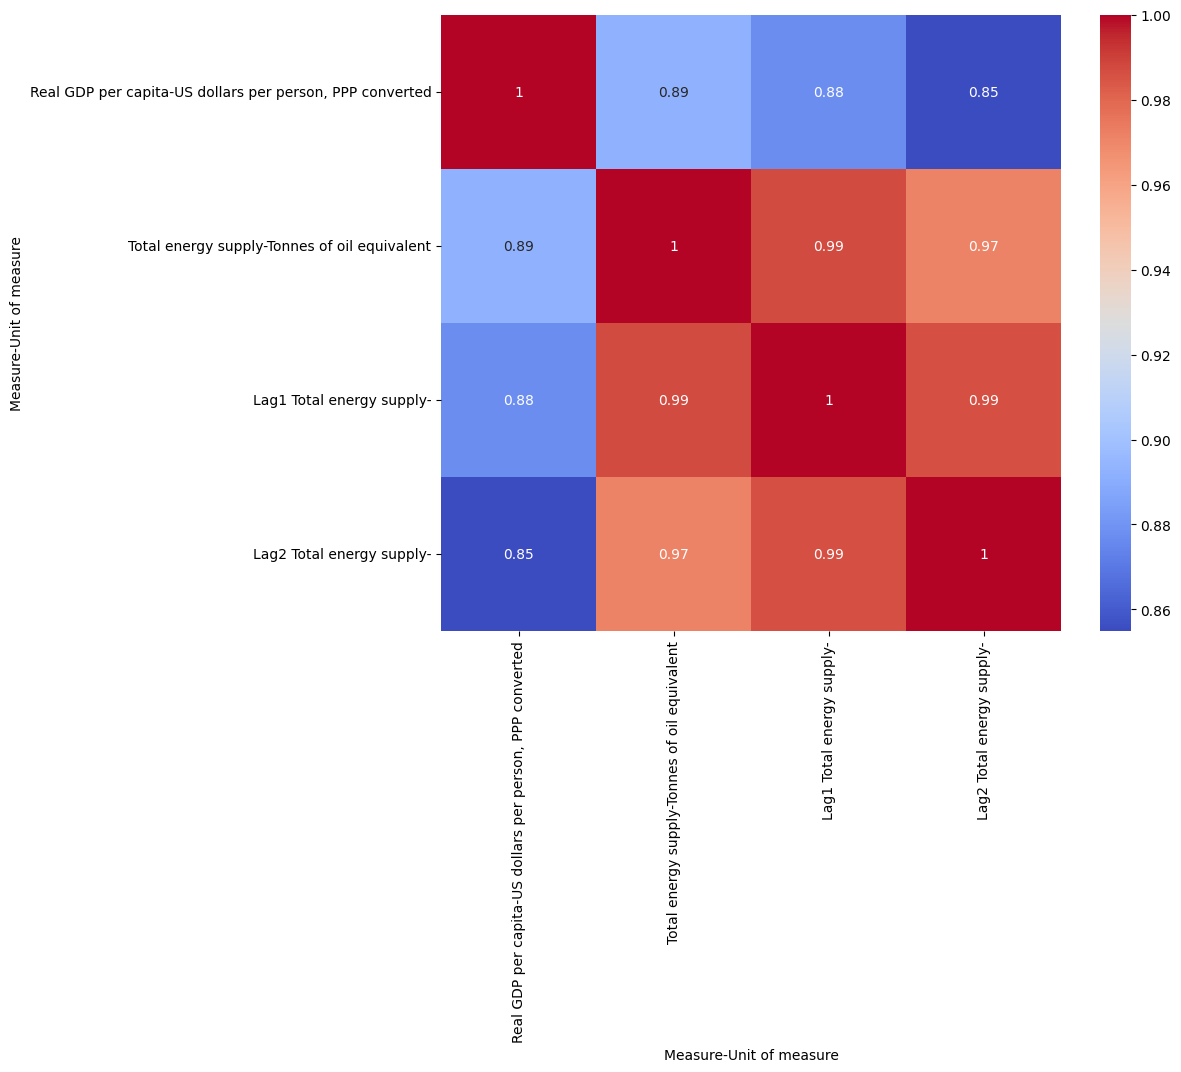

In [ ]:
# lihat correlation processed_df dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(exfac_train.corr(), annot=True, cmap='coolwarm')
plt.show()

Karena Total energy supply tanpa Lag masih memiliki korelasi paling kuat dibandingkan Lagnya, maka Total energy supply tanpa Lag yang dijadikan faktor eksternal. Fitur yang tidak dibutuhkan (Lagnya) akan dibiarkan.

In [ ]:
exfac_train = train[['Real GDP per capita', 'Total energy supply']]
exfac_test = test[['Real GDP per capita', 'Total energy supply']]

print(exfac_train.shape)
print(exfac_test.shape)

(30, 2)
(4, 2)


### **Melihat Stasioneritas Tren**

In [ ]:
for col in exfac_train.columns:
  print(f"\n Uji ADF untuk kolom '{col}':")
  test_stationarity(exfac_train[col])


 Uji ADF untuk kolom '('Real GDP per capita', 'US dollars per person, PPP converted')':
ADF Statistic: 1.437591828998962
p-value: 0.997278400241922
Data tidak stasioner (H0 diterima).

 Uji ADF untuk kolom '('Total energy supply', 'Tonnes of oil equivalent')':
ADF Statistic: 1.5936827666951023
p-value: 0.9978384992127044
Data tidak stasioner (H0 diterima).


Karena masih belum stasioner, maka diperlukan penerapan differencing

### **Mengatasi Stasioneritas**

In [ ]:
# differencing
exfac_train_diff = exfac_train.diff(1).dropna()

# Uji kembali stasionaritas setelah differencing
for col in exfac_train_diff.columns:
  print(f"\nUji ADF untuk kolom '{col}':")
  test_stationarity(exfac_train_diff[col])


Uji ADF untuk kolom '('Real GDP per capita', 'US dollars per person, PPP converted')':
ADF Statistic: -6.239695469182808
p-value: 4.7302852010766764e-08
Data stasioner (H0 ditolak).

Uji ADF untuk kolom '('Total energy supply', 'Tonnes of oil equivalent')':
ADF Statistic: -3.0130204465002732
p-value: 0.03369621620250016
Data stasioner (H0 ditolak).


Karena differencing 1 sudah membuat data stasioner, maka parameter d = 1.

### **Mengukur korelasi dengan menggunakan ACF dan PACF**

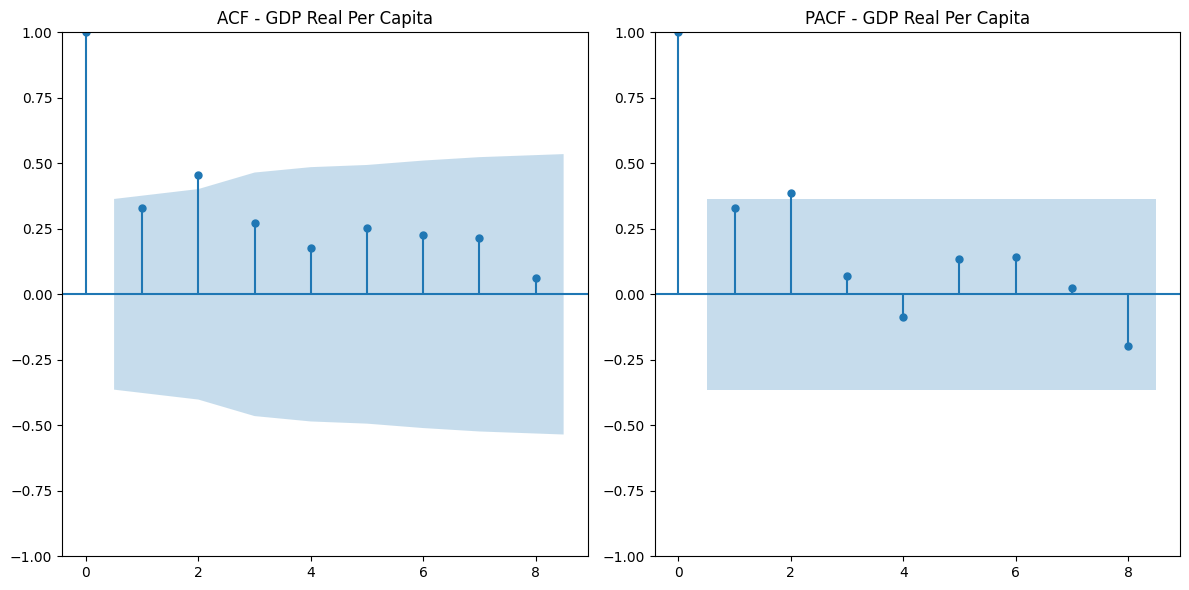

In [ ]:
# Mengukur Korelasi dengan ACF dan PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(exfac_train_diff['Real GDP per capita'], lags=8, ax=plt.gca())
plt.title("ACF - GDP Real Per Capita")

plt.subplot(122)
plot_pacf(exfac_train_diff['Real GDP per capita'], lags=8, ax=plt.gca())
plt.title("PACF - GDP Real Per Capita")
plt.tight_layout()
plt.show()

Dapat dilihat pada grafik ACF dan PACF diasumsikan sebagai cuts off, dan parameter (p,q) = (2,2) karena titik yang berada di luar kotak biru adalah lag ke-2 untuk kedua grafik. Pada grafik tersebut juga tidak menunjukkan adanya pola musiman.

### **ARIMAX**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

MAE (Mean Absolute Error): 317.66329975665076
RMSE (Root Mean Squared Error): 359.5186970613343
MAPE (Mean Absolute Percentage Error): 2.6147140385234477%


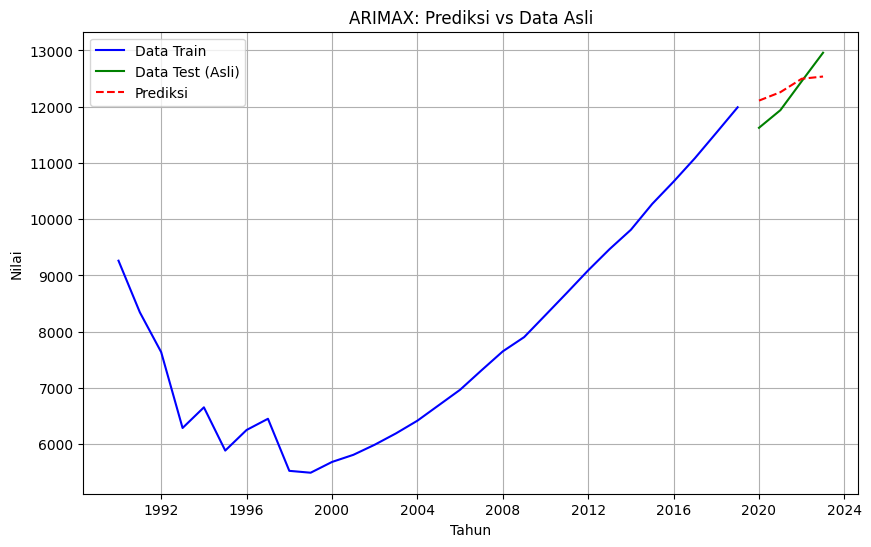

Prediksi: [12107.359503355256, 12257.27543339002, 12495.654980451278, 12535.57671816995]
Data Asli: Unit of measure  US dollars per person, PPP converted
TIME_PERIOD                                          
2020-01-01                                   11624.00
2021-01-01                                   11937.30
2022-01-01                                   12451.47
2023-01-01                                   12958.71


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Melatih model ARIMAX pada data train
model = ARIMA(exfac_train['Real GDP per capita'], exog=exfac_train['Total energy supply'], order=(2, 1, 2)) # menyesuaikan parameter ARIMA berdasarkan analisis sebelumnya
fitted_model = model.fit()

# Prediksi pada data test
predictions = fitted_model.forecast(steps=len(test['Real GDP per capita']), exog=exfac_test['Total energy supply'])

# Evaluasi Model: MAE, RMSE, MAPE
mae = mean_absolute_error(test['Real GDP per capita'], predictions)
rmse = np.sqrt(mean_squared_error(test['Real GDP per capita'], predictions))
mape = mean_absolute_percentage_error(test['Real GDP per capita'], predictions) * 100  # MAPE dalam persen

# Tampilkan hasil evaluasi
print(f'MAE (Mean Absolute Error): {mae}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}%')

# Visualisasi prediksi vs data asli
plt.figure(figsize=(10, 6))
# Plot data train
plt.plot(train.index, train['Real GDP per capita'], label='Data Train', color='blue')
# Plot data test (asli)
plt.plot(test.index, test['Real GDP per capita'], label='Data Test (Asli)', color='green')
# Plot prediksi
plt.plot(predictions.index, predictions, label='Prediksi', color='red', linestyle='--')

plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.title('ARIMAX: Prediksi vs Data Asli')
plt.legend()
plt.grid(True)
plt.show()

# Output prediksi dan data asli untuk verifikasi
print("Prediksi:", predictions.tolist())
print("Data Asli:", test['Real GDP per capita'])

Nilai MAPE < 5% menandakan model cukup baik dalam meramal data masa depan, hal ini bisa disebabkan data yang sangat kecil sehingga tidak bisa menjadi sangat baik dalam meramal data masa depan

#### **Learning Curves ARIMAX**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

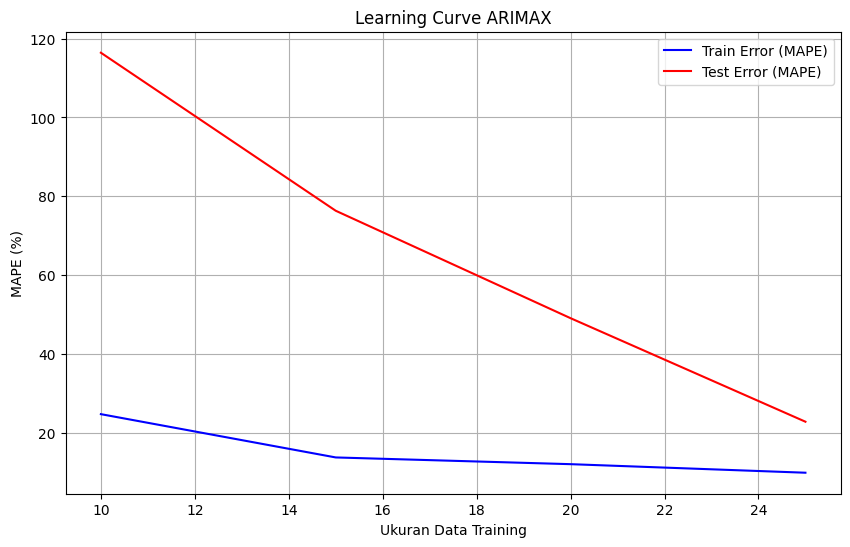

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Fungsi untuk menghitung MAPE
def calculate_mape(true, pred):
    return mean_absolute_percentage_error(true, pred) * 100

# Inisialisasi list untuk menyimpan hasil
train_sizes = []
train_errors = []
test_errors = []

# Iterasi dengan subset data training
for i in range(10, len(train), 5):  # Gunakan ukuran data train bertahap
    train_sizes.append(i)

    # Subset data train
    train_subset = train.iloc[:i]

    # Latih model ARIMAX pada subset
    model = ARIMA(train_subset['Real GDP per capita'], exog=train_subset['Total energy supply'],
                  order=(2, 1, 2))  # Sesuaikan parameter
    fitted_model = model.fit()

    # Prediksi pada data train subset
    train_pred = fitted_model.predict(start=0, end=i - 1, exog=train_subset['Total energy supply'])
    train_true = train_subset['Real GDP per capita']

    # Hitung error pada data train subset
    train_mape = calculate_mape(train_true, train_pred)
    train_errors.append(train_mape)

    # Prediksi pada data test
    test_pred = fitted_model.forecast(steps=len(test['Real GDP per capita']), exog=exfac_test['Total energy supply'])
    test_true = test['Real GDP per capita']

    # Hitung error pada data test
    test_mape = calculate_mape(test_true, test_pred)
    test_errors.append(test_mape)

# Visualisasi learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Train Error (MAPE)', color='blue')
plt.plot(train_sizes, test_errors, label='Test Error (MAPE)', color='red')
plt.xlabel('Ukuran Data Training')
plt.ylabel('MAPE (%)')
plt.title('Learning Curve ARIMAX')
plt.legend()
plt.grid(True)
plt.show()

Dari grafik learning curve tersebut dapat dilihat bahwa semakin banyak data, Test error semakin menurun dan mendekati Train error. Hal ini menandakan model menuju good fit saat data semakin banyak.

## **Perbandingan ARIMA vs ARIMAX**

Berdasarkan hasil evaluasi, model ARIMAX menunjukkan performa yang lebih baik dibandingkan ARIMA dalam hal ketiga metrik evaluasi, yaitu MAE, RMSE, dan MAPE. ARIMAX memiliki MAE sebesar 317.66, lebih rendah dibandingkan ARIMA yang mencapai 356.60, menunjukkan bahwa ARIMAX menghasilkan prediksi dengan kesalahan absolut rata-rata yang lebih kecil. Selain itu, nilai RMSE ARIMAX sebesar 359.52 lebih rendah dibandingkan ARIMA sebesar 402.16, mengindikasikan ARIMAX lebih konsisten dalam memprediksi dengan kesalahan yang lebih kecil. Dari segi MAPE, ARIMAX mencatatkan 2.61%, lebih baik daripada ARIMA dengan 2.96%, menunjukkan bahwa ARIMAX lebih akurat dalam memprediksi nilai relatif terhadap data sebenarnya. Performa superior ARIMAX dapat disebabkan oleh kemampuan model ini untuk memasukkan variabel independen tambahan, yang memberikan informasi tambahan dalam menangkap pola data yang lebih kompleks dibandingkan ARIMA.

## **Forecast menggunakan ARIMA**

Memprediksi nilai GDP untuk 5 tahun ke depan (yaitu dari 2024-2028)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

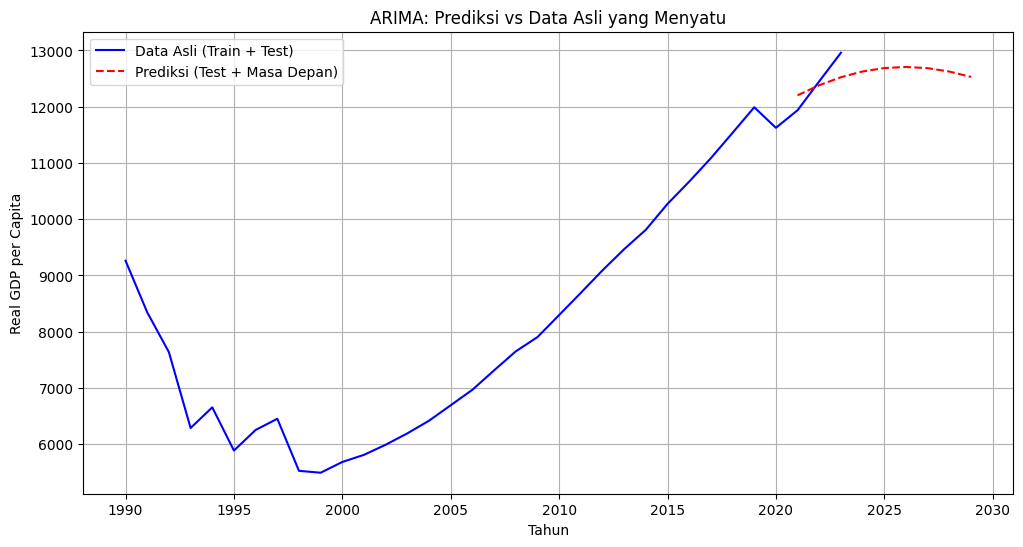

MAE (Mean Absolute Error): 356.6034888068298
RMSE (Root Mean Squared Error): 402.162175535559
MAPE (Mean Absolute Percentage Error): 2.958669959724348%
Prediksi 5 Tahun ke Depan:
       Tahun      Prediksi
0 2024-12-31  12686.091129
1 2025-12-31  12705.479959
2 2026-12-31  12684.149553
3 2027-12-31  12623.976298
4 2028-12-31  12527.806366


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Latih model ARIMA pada data train
model = ARIMA(train['Real GDP per capita'], order=(2, 1, 2))  # Sesuaikan parameter ARIMA berdasarkan analisis sebelumnya
fitted_model = model.fit()

# Prediksi untuk data test dan 5 tahun ke depan
n_test = len(test)
n_forecast = n_test + 5
predictions = fitted_model.forecast(steps=n_forecast)

# Atur indeks prediksi
start_year = test.index[0].year  # Tahun pertama data test
future_years = pd.date_range(start=f"{start_year}", periods=n_forecast, freq='Y')

# Gabungkan data asli (train + test) dan prediksi
combined_data = pd.concat([train['Real GDP per capita'], test['Real GDP per capita']])
combined_predictions = pd.Series(predictions.values, index=future_years)

# Visualisasi prediksi dan data asli
plt.figure(figsize=(12, 6))
# Plot data asli (train + test)
plt.plot(combined_data.index, combined_data, label='Data Asli (Train + Test)', color='blue')
# Plot prediksi (test + masa depan)
plt.plot(combined_predictions.index, combined_predictions, label='Prediksi (Test + Masa Depan)', color='red', linestyle='--')

plt.xlabel('Tahun')
plt.ylabel('Real GDP per Capita')
plt.title('ARIMA: Prediksi vs Data Asli yang Menyatu')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi Model: MAE, RMSE, MAPE untuk data test
test_predictions = predictions[:n_test]
mae = mean_absolute_error(test['Real GDP per capita'], test_predictions)
rmse = np.sqrt(mean_squared_error(test['Real GDP per capita'], test_predictions))
mape = mean_absolute_percentage_error(test['Real GDP per capita'], test_predictions) * 100  # MAPE dalam persen

# Tampilkan hasil evaluasi
print(f"MAE (Mean Absolute Error): {mae}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"MAPE (Mean Absolute Percentage Error): {mape}%")

# Output prediksi masa depan
future_predictions = predictions[n_test:]
print("Prediksi 5 Tahun ke Depan:")
print(pd.DataFrame({'Tahun': future_years[-5:], 'Prediksi': future_predictions.values[-5:]}))

## **Hyperparameter Tuning dengan autoarima**

In [ ]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=435.602, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=425.489, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=433.834, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=426.139, Time=0.50 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=423.942, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=425.007, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=422.505, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=420.716, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=422.546, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 2.65

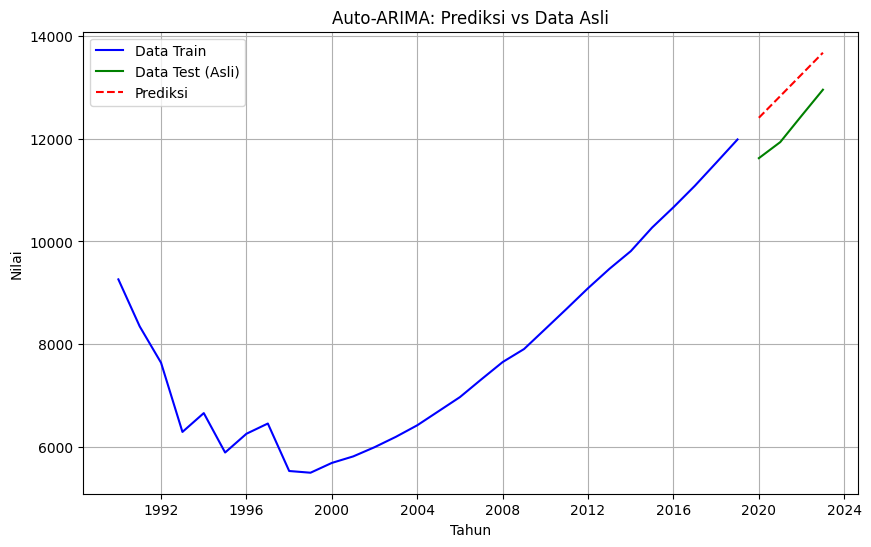

Prediksi: [12411.575466165557, 12834.310932331115, 13257.046398496672, 13679.781864662229]
Data Asli: Unit of measure  US dollars per person, PPP converted
TIME_PERIOD                                          
2020-01-01                                   11624.00
2021-01-01                                   11937.30
2022-01-01                                   12451.47
2023-01-01                                   12958.71


In [ ]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Melatih model Auto-ARIMA pada data train
auto_model = auto_arima(train['Real GDP per capita'],
                        seasonal=False,  # Set to True jika data musiman
                        trace=True,      # Untuk melihat proses pencarian parameter
                        error_action='ignore',  # Abaikan warning saat mencoba parameter
                        suppress_warnings=True,
                        stepwise=True)   # Pendekatan stepwise untuk percepatan

# Output parameter terbaik yang dipilih oleh Auto-ARIMA
print(f"Best ARIMA order: {auto_model.order}")

# Prediksi pada data test
predictions = auto_model.predict(n_periods=len(test['Real GDP per capita']))

# Evaluasi Model: MAE, RMSE, MAPE
mae = mean_absolute_error(test['Real GDP per capita'], predictions)
rmse = np.sqrt(mean_squared_error(test['Real GDP per capita'], predictions))
mape = mean_absolute_percentage_error(test['Real GDP per capita'], predictions) * 100  # MAPE dalam persen

# Tampilkan hasil evaluasi
print(f'MAE (Mean Absolute Error): {mae}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}%')

# Visualisasi prediksi vs data asli
plt.figure(figsize=(10, 6))
# Plot data train
plt.plot(train.index, train['Real GDP per capita'], label='Data Train', color='blue')
# Plot data test (asli)
plt.plot(test.index, test['Real GDP per capita'], label='Data Test (Asli)', color='green')
# Plot prediksi
plt.plot(test.index, predictions, label='Prediksi', color='red', linestyle='--')

plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.title('Auto-ARIMA: Prediksi vs Data Asli')
plt.legend()
plt.grid(True)
plt.show()

# Output prediksi dan data asli untuk verifikasi
print("Prediksi:", predictions.tolist())
print("Data Asli:", test['Real GDP per capita'])


Dapat dilihat bahwa hasil dari autoarima atau Hyperparameter tuning tidak lebih baik daripada menetapkan parameter secara manual